# <u><span style="background-color: red;">__02_LimpiezaEDA__</span></u>  

Objetivo:
- Limpieza de fechas (ponerlas en formato correcto), valores nulos, duplicados, etc.
- Ver qué columnas pueden servir para el modelo y cuáles descartar.
- Generar nuevas features útiles (feature engineering) con nuevas columnas como día de la semana, mes, estacionalidad, etc.
- EDA: visualizar patrones, correlaciones, tendencias, estacionalidad, outliers, etc.

### <u><span style="background-color: #00ffb792;">__A) Introducción y Contextualización del Problema (Negocio + Técnica breve)__</span></u>  

**Introducción y Contextualización del Problema**

El sector farmacéutico enfrenta el reto de **gestionar adecuadamente la demanda de medicamentos**, donde un error de previsión puede traducirse en **quiebres de stock** (afectando a pacientes y reputación) o en **excesos de inventario** (que generan costes innecesarios y caducidad de productos).  

Nuestro modelo aborda este desafío mediante el **análisis de datos históricos de ventas farmacéuticas**, permitiendo identificar patrones de consumo, estacionalidad y tendencias de crecimiento o caída en diferentes grupos terapéuticos.

**Ejemplo práctico**:  
Si sabemos que los fármacos para el sistema respiratorio (R03) aumentan sus ventas en invierno, la empresa puede **anticipar compras y distribución** para garantizar disponibilidad en farmacias y hospitales.  

---

#### Conjunto de datos utilizado
El análisis se basa en el dataset público de **ventas farmacéuticas** disponible en Kaggle:  
- **Fuente**: [Pharma Sales Data – Kaggle](https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data)  
- **Granularidades**: datos disponibles en niveles **horario, diario, semanal y mensual**.  
- **Variables clave**: fecha (`datum`), grupos terapéuticos de medicamentos (`M01AB`, `M01AE`, `N02BA`, `N02BE`, `N05B`, `N05C`, `R03`, `R06`) y métricas agregadas de **ventas totales** (`Total sales`).  

---

#### Objetivos de negocio perseguidos
- **Reducir costos** optimizando el nivel de inventarios.  
- **Mejorar la eficiencia** en la cadena de suministro farmacéutica.  
- **Detectar riesgos** asociados a quiebres de stock o picos inesperados de demanda.  
- **Respaldar decisiones estratégicas** con evidencia cuantitativa y visual.  


### <u><span style="background-color: #00ffb792;">__B) Valor del Modelo y Aplicaciones Prácticas (Negocio)__</span></u>  

#### **1 - Cómo el modelo aporta valor al negocio**  

El modelo de análisis de ventas farmacéuticas genera **información accionable** a partir de datos históricos.  
Esto se traduce en:  
- **Decisiones más informadas** → el negocio puede anticipar tendencias de consumo de medicamentos (picos, estacionalidad, caídas inesperadas).  
- **Automatización de reportes** → en vez de generar manualmente informes en Excel, se dispone de dashboards dinámicos y automáticos.  
- **Reducción de errores humanos** → al trabajar con pipelines de datos, se minimiza el riesgo de cálculos incorrectos o pérdida de información.  
- **Optimización de inventarios** → saber qué medicamentos rotan más permite ajustar compras y reducir costes por exceso o faltantes.  
- **Aumento de ingresos** → campañas promocionales o acuerdos con proveedores pueden basarse en evidencia real de ventas.  

---

#### **2 - Casos de uso reales o potenciales**  

Ejemplos de cómo se aprovecharía en el día a día:  
- **Departamento de Compras** → recibe alertas de stock bajo cuando un medicamento tiene un patrón de venta creciente (ej. *N02BA – analgésicos*).  
- **Marketing** → planifica promociones estacionales (ej. mayor consumo de *R03 – fármacos respiratorios* en invierno).  
- **Dirección Financiera** → proyecta ingresos anuales a partir de las tendencias detectadas (gráficas [E2] y [E3]).  
- **Farmacéuticos de oficina** → pueden prever la demanda y asegurar disponibilidad de tratamientos críticos para pacientes crónicos.  
- **Distribuidores** → ajustan su logística (frecuencia de entregas, rutas) en función de las ventas por semana o por hora ([E5]).  

---

#### **3 - Conexión con los objetivos estratégicos de la empresa** 

El proyecto contribuye directamente a los **objetivos estratégicos** de una empresa farmacéutica o distribuidora:  

- **Eficiencia operativa**: alinear compras, stock y logística con la demanda real.  
- **Satisfacción del cliente/paciente**: garantizar que siempre haya disponibilidad de medicamentos esenciales.  
- **Innovación tecnológica**: aprovechar modelos de analítica avanzada para diferenciarse de la competencia.  
- **Crecimiento sostenible**: reducir costes de almacenamiento, mejorar márgenes y reinvertir en expansión.  
- **Cumplimiento normativo**: disponer de un histórico claro y trazable de ventas ayuda a responder ante auditorías.  

---

En resumen: este modelo no solo describe lo ocurrido, sino que también **predice y recomienda** → convirtiéndose en un **activo estratégico** para la toma de decisiones.

### <u><span style="background-color: #00ffb792;">__C) Índice__</span></u>  

<u><span style="background-color: #00AAFF;">__1 - Preparación y exploración inicial__</span></u>  

- [1.1 - Carga de datos](#11---carga-de-datos)  

- [1.2 - Chequeo de dimensiones y tipos](#12---chequeo-de-dimensiones-y-tipos)  
      - Usar `df.shape`, `df.info()`, `df.describe()`.  
      - Verificar datos faltantes con `isna().sum()`.  

- [1.3 - Formato de fechas](#13---formato-de-fechas)  
      - Convertir `datum` a `datetime`.  
      - Ordenar por fecha.  
      - Extraer variables derivadas: año, mes, día, día de la semana, hora *en dataset hourly*.  

- [1.4 - Chequeo de consistencia temporal](#14---chequeo-de-consistencia-temporal)  
  - [1.4.1 - Validación de duplicados, rango y frecuencia de fechas](#141---validacion-de-duplicados-rango-y-frecuencia-de-fechas)  
  - [1.4.2 - Almacenamiento del rango mínimo y máximo de fechas](#142---almacenamiento-del-rango-minimo-y-maximo-de-fechas)  
  - [1.4.3 - Creación de variables temporales derivadas](#143---creacion-de-variables-temporales-derivadas)  
  - [1.4.4 - Reordenación de columnas](#144---reordenacion-de-columnas)  

---

<u><span style="background-color: #00AAFF;">__2 - Análisis descriptivo global__</span></u>  

- [2.1 - Top fechas por ventas](#21---top-fechas-por-ventas)  
      - Calcular `Total_sales` por fila.  

- [2.2 - Ranking y porcentaje de cada categoría](#22---ranking-y-porcentaje-de-cada-categoria)   
      - Ranking de categorías por ventas.  
      - Porcentaje de cada categoría sobre el total.  
      - Visualización del ranking de categorías (barplot)  
    
- [2.3 - Medidas de tendencia y dispersión](#23---medidas-de-tendencia-y-dispersion)  
      - Medidas de tendencia central y dispersión  
      - Detección de outliers por dos métodos: IQR (rango intercuartílico) y Z-score (desviaciones estándar) 

---

<u><span style="background-color: #00AAFF;">__3 - Visualizaciones principales__</span></u>  

- [3.1 - Series temporales](#31---series-temporales)  
  - [3.1.1 - Series temporales de Total sales por granularidad](#311---series-temporales-de-total-sales-por-granularidad)  
  - [3.1.2 - Tendencia suavizada con media móvil por granularidad](#312---tendencia-suavizada-con-media-movil-por-granularidad)  
  - [3.1.3 - Tendencia anual agregada (Monthly por año)](#313---tendencia-anual-agregada-monthly-por-ano)  
  - [3.1.4 - Serie temporal semanal (Weekly)](#314---serie-temporal-semanal-weekly)  
  - [3.1.5 - Serie temporal Hourly promedio por hora](#315---serie-temporal-hourly-promedio-por-hora)  
- [3.2 - Distribuciones](#32---distribuciones)  
- [3.3 - Comparaciones](#33---comparaciones)  

---

<u><span style="background-color: #00AAFF;">__4 - Análisis de patrones y correlaciones__</span></u>  

- [4.1 - Correlaciones entre categorías](#41---correlaciones-entre-categorias)  
      - Relaciones entre fármacos  
- [4.2 - Estacionalidad](#42---estacionalidad)  
      - Repetir patrones en meses/años (boxplots y líneas por año)  
- [4.3 - Cambios de tendencia o picos](#43---cambios-de-tendencia-o-picos)  
        - Eventos o campañas

---

<u><span style="background-color: #00AAFF;">__5 - Estudios numéricos__</span></u>  

- [5.1 - KPIs globales por granularidad](#51---kpis-globales-por-granularidad)  
- [5.2 - Crecimiento anual (YoY) y CAGR](#52---crecimiento-anual-yoy-y-cagr)  
- [5.3 - Estacionalidad por mes (Daily) – Índice mensual](#53---estacionalidad-por-mes-daily--indice-mensual)  
- [5.4 - Patrón semanal (Daily) – Uplift por día](#54---patron-semanal-daily--uplift-por-dia)  
- [5.5 - Patrón horario (Hourly) – Uplift por hora](#55---patron-horario-hourly--uplift-por-hora)  
- [5.6 - Mix de categorías (ATC)](#56---mix-de-categorias-atc)  
- [5.7 - “Top N” periodos y anomalías](#57---top-n-periodos-y-anomalias)  
- [5.8 - Correlaciones entre categorías (Spearman)](#58---correlaciones-entre-categorias-spearman)  
- [5.9 - “One-pager” ejecutivo por dataset](#59---one-pager-ejecutivo-por-dataset)  
- [5.10 - Exportables para el informe](#510---exportables-para-el-informe)  

---

<u><span style="background-color: #00AAFF;">__6 - Conclusiones y hallazgos__</span></u>  

- [Conclusiones y hallazgos](#6---conclusiones-y-hallazgos)  

### <u><span style="background-color: #00AAFF;">__1 - Preparación y exploración inicial__</span></u> 

<a id="sec-11-carga-de-datos"></a>
#### **1.1 - Carga de datos** 

In [1]:
# Importamos librerías
import pandas as pd

Cargo los 4 datasets que tengo.

In [2]:
# Cargar los datasets raw
# https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data
df_saleshourly_raw = pd.read_csv("../data/raw/saleshourly.csv")
df_salesdaily_raw = pd.read_csv("../data/raw/salesdaily.csv")
df_salesweekly_raw = pd.read_csv("../data/raw/salesweekly.csv")
df_salesmonthly_raw = pd.read_csv("../data/raw/salesmonthly.csv")

Guardemos una copia de los df en la carpeta processed para no sobreescribirlos.

In [3]:
# Guardamos una copia para el procesado del df
df_saleshourly_processed = df_saleshourly_raw.copy()
df_salesdaily_processed = df_salesdaily_raw.copy()
df_salesweekly_processed = df_salesweekly_raw.copy()
df_salesmonthly_processed = df_salesmonthly_raw.copy()

Podemos comprobar que los archivos se han guardado correctamente.

In [4]:
import os

os.listdir("../data/processed/")

['salesdaily_clean.csv',
 'saleshourly_clean.csv',
 'salesmonthly_clean.csv',
 'salesweekly_clean.csv']

Ponemos los directorios para guardar las imágenes.

In [5]:
from pathlib import Path
import matplotlib.pyplot as plt
DOCS_DIR = Path("../docs")
ARTI_DIR = DOCS_DIR / "artifacts"
PLOTS_DIR = DOCS_DIR / "plots"
ARTI_DIR.mkdir(parents=True, exist_ok=True)
PLOTS_DIR.mkdir(parents=True, exist_ok=True)

def savefig(name: str, dpi: int = 150):
    out = PLOTS_DIR / f"{name}.png"
    plt.savefig(out, dpi=dpi, bbox_inches="tight")
    print(f"[OK] Figura guardada: {out}")

In [6]:
# Metemos los datasets de csv juntos para trabajarlos a la vez
datasets = {
    "Hourly": df_saleshourly_processed,
    "Daily": df_salesdaily_processed,
    "Weekly": df_salesweekly_processed,
    "Monthly": df_salesmonthly_processed
}

#### **1.2 - Chequeo de dimensiones y tipos**

Continuamos con la limpieza y orden de fechas que empezamos en el notebook `01_Fuentes`, donde hicimos `info()`y `describe()`.

In [7]:
shape_all = {}

for name, df in datasets.items(): # devuelve (clave, valor), name= nombre del dataset, df= dataframe correspondiente
    shape_all[name] = df.shape # shape devuelve una tupla (n_filas, n_columnas)

shape_all

{'Hourly': (50532, 13),
 'Daily': (2106, 13),
 'Weekly': (302, 9),
 'Monthly': (70, 9)}

Como vimos en el notebook 1, estos datos cumplen las siguientes características:  
- No tienen valores nulos.
- La columna `datum` es la fecha, por lo que debo pasarlo de objeto a datetime.
- Las ventas están en float, por lo que no tenemos que modificarlas. Lo que sí es cierto que en algunas no aparecen números enteros porque en esa oficina de farmacia han dispensado unidades sueltas del medicamento que contenía la caja. 
- La columna `ATC` quiere decir clasificación Anatómica - Terapéutica - Química. Es un sistema de clasificación de medicamentos desarrollado por la Organización Mundial de la Salud (OMS). Este sistema divide los medicamentos en diferentes grupos basados en el órgano o sistema sobre el que actúan, sus propiedades terapéuticas y químicas. 

Por tanto, los siguientes pasos van a ser:
- Convertir `datum` a formato datetime en todos los datasets.
- Comprobar rangos de fechas y posibles duplicados.
- Analizar correlaciones entre categorías, por ejemplo, si hay medicamentos que suelan venderse juntos.
- Visualizar series: tendencia, estacionalidad, picos, etc.

Feature engineering inicial:
- Extraer año, mes, día, día de la semana y hora.
- Crear una columna `total_sales` que sea la suma de todas las categorías.

---
#### <u><span style="background-color: #ffcc0055;">__Políticas de limpieza y decisiones tomadas__</span></u>

A lo largo de este notebook se van a aplicar y documentar diferentes **decisiones de limpieza y preparación de datos**. A continuación se resumen explícitamente:

1. **Carga y preparación inicial**  
   - Los datasets se cargan desde `data/raw/` y se guardan copias en `data/processed/`.  
   - Se establece que la carpeta `processed/` será el espacio de staging para trabajar las transformaciones, manteniendo los datos originales intactos en `raw/`.  

2. **Políticas de nulos**  
   - En `datum` (fechas) se eliminarán registros nulos, ya que no se pueden imputar.  
   - En columnas numéricas (`Total_sales`, ATC) se imputarán nulos con **0** cuando representen ausencia de ventas, y con **mediana** en otros casos para no sesgar la distribución.  

3. **Políticas de duplicados**  
   - Se eliminarán duplicados basados en la clave temporal (`datum` + granularidad).  
   - Esta decisión evita distorsiones en las métricas y visualizaciones.  

4. **Gestión de outliers**  
   - Se detectaron mediante IQR y Z-score.  
   - No se eliminan, pues pueden reflejar campañas o picos reales de ventas.  
   - Se marcan con una variable auxiliar (`is_outlier`) para permitir filtrados en análisis o modelos posteriores.  

5. **Tipos de datos**  
   - Variables de ventas y categorías → convertidas a `float`.  
   - Variables derivadas de calendario (año, mes, día, hora, día_semana) → convertidas a `int` para facilitar su uso en modelos.  

6. **Consistencia temporal y anclas**  
   - **Hourly:** cada fila corresponde a una hora natural (00:00–23:00).  
   - **Daily:** cada fila corresponde a un día natural completo.  
   - **Weekly:** se ha confirmado que la serie está anclada en **W-MON**, es decir, comienza el lunes y termina el domingo.  
   - **Monthly:** cada fila representa el **último día del mes**, acumulando todo el mes.  

---

Con estas decisiones, los datasets procesados quedan listos para:  
- El análisis exploratorio (visualizaciones, estadísticas descriptivas).  
- El entrenamiento de modelos en fases posteriores.  
- Garantizar consistencia, trazabilidad y claridad en el flujo de datos.  

#### **1.3 - Formato de fechas**  

Convertir `datum` a datetime y ordenar.  

Primero uso `df['datum'] = pd.to_datetime(df['datum'])` para convertir la columna `datum` que viene como texto object a un tipo de dato `datetime64[ns]` de pandas. Así permite usar las funciones de fechas de pandas: `.dt.year`, `.dt.month`, `.dt.day`, `.dt.dayofweek`, etc. y podemos ordenar correctamente por fecha (sin que lo trate como texto). Es fundamental para graficar series temporales y para los modelos de predicción.  

Después usaré `df.sort_values('datum', inplace=True)` para que se ordene la serie temporal cronológicamente y que el gráfico y las tendendias tengan una lógica.

In [8]:
for name, df in datasets.items():
    df['datum'] = pd.to_datetime(df['datum'])
    df.sort_values('datum', inplace=True)
    print(df['datum'].dtype) # si quiero imprimir para comprobar que se ha cambiado correctamente

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


Crear columna `total_sales` antes de crear el resto de columnas derivadas. Es la suma de las categorías de ventas ATC.   

Esta nueva columna de `total_sales` será la variable objetivo o target. Debo obtener algo similar a:  
M01AB = 5, M01AE = 3, N02BA = 2  
Total sales = 5 + 3 + 2 = 10  

#### **1.4 - Chequeo de consistencia temporal**  

**1.4.1 - Validación de duplicados, rango y frecuencia de fechas**

Agregamos un paso opcional intermedio para validar si alguna fecha está duplicada, falta o está fuera de orden.  
En este caso, vemos que no es necesario porque está correcto.

In [9]:
for name, df in datasets.items():
    print(f"\n--- Validación de fechas para {name} ---")
    
    # Comprobar duplicados
    duplicated_dates = df['datum'].duplicated().sum()
    print(f"Fechas duplicadas: {duplicated_dates}")
    
    # Comprobar rango y frecuencia
    min_date, max_date = df['datum'].min(), df['datum'].max()
    print(f"Rango de fechas: {min_date} → {max_date}")
    
    # Detectar frecuencia según dataset
    if name == "Daily":
        freq = "D"
    elif name == "Weekly":
        freq = "W"
    elif name == "Monthly":
        freq = "M"
    elif name == "Hourly":
        freq = "H"
    
    # Generar rango completo esperado y ver si faltan fechas
    full_range = pd.date_range(start=min_date, end=max_date, freq=freq)
    missing_dates = len(set(full_range) - set(df['datum']))
    print(f"Fechas faltantes: {missing_dates}")
    
    # Confirmar si están ordenadas correctamente
    if not df['datum'].is_monotonic_increasing:
        print("Las fechas NO están ordenadas cronológicamente.")
    else:
        print("Fechas ordenadas correctamente.")

print()


--- Validación de fechas para Hourly ---
Fechas duplicadas: 0
Rango de fechas: 2014-01-02 08:00:00 → 2019-10-08 19:00:00
Fechas faltantes: 0
Fechas ordenadas correctamente.

--- Validación de fechas para Daily ---
Fechas duplicadas: 0
Rango de fechas: 2014-01-02 00:00:00 → 2019-10-08 00:00:00
Fechas faltantes: 0
Fechas ordenadas correctamente.

--- Validación de fechas para Weekly ---
Fechas duplicadas: 0
Rango de fechas: 2014-01-05 00:00:00 → 2019-10-13 00:00:00
Fechas faltantes: 0
Fechas ordenadas correctamente.

--- Validación de fechas para Monthly ---
Fechas duplicadas: 0
Rango de fechas: 2014-01-31 00:00:00 → 2019-10-31 00:00:00
Fechas faltantes: 0
Fechas ordenadas correctamente.



C:\Users\AnaGu\AppData\Local\Temp\ipykernel_25372\2376280200.py:23: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(start=min_date, end=max_date, freq=freq)
C:\Users\AnaGu\AppData\Local\Temp\ipykernel_25372\2376280200.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_range = pd.date_range(start=min_date, end=max_date, freq=freq)


**1.4.2 - Almacenamiento del rango mínimo y máximo de fechas**

Calculo en rango de fechas para cada dataset. De esta forma se sabe el rango temporal de cada df por ver si hay solapamientos o huecos.  
Al final debo obtener algo similar a:
```
{
 'Hourly': (fecha_mínima, fecha_máxima),
 'Daily': (fecha_mínima, fecha_máxima),
 'Weekly': (fecha_mínima, fecha_máxima),
 'Monthly': (fecha_mínima, fecha_máxima)
}
```

In [10]:
date_ranges = {name: 
               (df['datum'].min(),              # calcula de cada dataset la fecha mínima
                df['datum'].max()) for name,    # calcula de cada dataset la fecha máxima
                df in datasets.items()}         # las guarda en una tupla con fecha de inicio y fin

**1.4.3 - Creación de variables temporales derivadas**

Features adicionales: año, mes, día, día de la semana, hora.  

Aquí extraemos los datos de las fechas para detectar patrones estacionales (mensuales, por ejemplo).

In [11]:
for name, df in datasets.items():
    df['Year'] = df['datum'].dt.year                     # extrae el año de cada fecha, ya lo tengo del csv
    df['Month'] = df['datum'].dt.month                   # extrae el mes (1 a 12), ya lo tengo del csv
    df['Day'] = df['datum'].dt.day                       # extrae el día del mes (1 a 31)
    df['Weekday Number'] = df['datum'].dt.dayofweek + 1  # extrae el día de la semana, pongo + 1 para que lunes = 1
    if name == "Hourly":
        df['Hour'] = df['datum'].dt.hour

Veo como me va quedando la tabla.

In [12]:
df_salesdaily_processed.head()

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0 2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1 2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2 2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
3 2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
4 2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

   Hour Weekday Name  Day  Weekday Number  
0   248     Thursday    2               4  
1   276       Friday    3               5  
2   276     Saturday    4               6  
3   276       Sunday    5               7  
4   276       Monday    6               1

<span style="background-color: red;">¡Atención! </span> 

La columna `Hour` sólo saldrá correcta en `df_saleshourly_processed`, no en el resto de df ya que no dicen la hora.

**1.4.4 - Reordenación de columnas**

Como no me gusta el orden final de las columnas, voy a modificarlas.

In [13]:
def move_column(df, col_to_move, after_col):
    cols = list(df.columns)

    if col_to_move in cols and after_col in cols:  # Evitar errores si la columna no existe
        cols.insert(cols.index(after_col) + 1, cols.pop(cols.index(col_to_move)))
        df = df[cols]
    return df

In [14]:
for name, df in datasets.items():
    df = move_column(df, 'Day', 'Month') # Mover Day después de Month
    df = move_column(df, 'Weekday Number', 'Weekday Name') # Mover Weekday Number después de Weekday Name
    datasets[name] = df  # Guardar

In [15]:
# Asignamos de vuelta a las variables originales
df_saleshourly_processed = datasets['Hourly']
df_salesdaily_processed = datasets['Daily']
df_salesweekly_processed = datasets['Weekly']
df_salesmonthly_processed = datasets['Monthly']

Compruebo que ahora sí está más visual.

In [16]:
df_saleshourly_processed.head(3)

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C  R03  R06  Year  \
0 2014-01-02 08:00:00    0.0   0.67    0.4    2.0   0.0   0.0  0.0  1.0  2014   
1 2014-01-02 09:00:00    0.0   0.00    1.0    0.0   2.0   0.0  0.0  0.0  2014   
2 2014-01-02 10:00:00    0.0   0.00    0.0    3.0   2.0   0.0  0.0  0.0  2014   

   Month  Day  Hour Weekday Name  Weekday Number  
0      1    2     8     Thursday               4  
1      1    2     9     Thursday               4  
2      1    2    10     Thursday               4

In [17]:
df_salesdaily_processed.head(3)

datum  M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
0 2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
1 2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2 2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   

   Day  Hour Weekday Name  Weekday Number  
0    2   248     Thursday               4  
1    3   276       Friday               5  
2    4   276     Saturday               6

In [18]:
df_salesweekly_processed.head(3)

datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06  Year  \
0 2014-01-05  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0  2014   
1 2014-01-12  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2  2014   
2 2014-01-19  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0  2014   

   Month  Day  Weekday Number  
0      1    5               7  
1      1   12               7  
2      1   19               7

In [19]:
df_salesmonthly_processed.head(3)

datum   M01AB   M01AE    N02BA     N02BE   N05B  N05C    R03   R06  \
0 2014-01-31  127.69   99.09  152.100   878.030  354.0  50.0  112.0  48.2   
1 2014-02-28  133.32  126.05  177.000  1001.900  347.0  31.0  122.0  36.2   
2 2014-03-31  137.44   92.95  147.655   779.275  232.0  20.0  112.0  85.4   

   Year  Month  Day  Weekday Number  
0  2014      1   31               5  
1  2014      2   28               5  
2  2014      3   31               1

### <u><span style="background-color: #00AAFF;">__2 - Análisis descriptivo global__</span></u>  

#### **2.1 - Top fechas por ventas** 

Hagamos pues un top 5 de fechas que tengan el número mayor de ventas totales por cada dataset.

- Si los picos se repiten en las mismas fechas todos los años quiere decir hay eventos estacionales (promociones, fiestas, cambios de temporada, etc).

- Si los picos son aislados podrían ser campañas puntuales, reposiciones masivas o errores de registro.

Me sirve también para investigar outliers que pueden distorsionar análisis posteriores o que merezcan especial atención.

In [20]:
for name, df in datasets.items():
    drugs = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
    df['Total sales'] = df[drugs].sum(axis=1, skipna=True) 

# Top fechas con más ventas
print("\n=== Top 5 fechas con mayor Total sales por dataset ===")
for name, df in datasets.items():
    top = df.nlargest(5, 'Total sales')[['datum', 'Total sales']].copy()
    print(f"\n{name}:")
    print(top)


=== Top 5 fechas con mayor Total sales por dataset ===

Hourly:
                    datum  Total sales
26236 2016-12-30 12:00:00        37.00
43088 2018-12-02 16:00:00        36.00
18516 2016-02-12 20:00:00        34.33
33339 2017-10-22 11:00:00        34.00
9179  2015-01-19 19:00:00        31.00

Daily:
          datum  Total sales
1093 2016-12-30      198.950
1844 2019-01-20      162.283
1094 2016-12-31      151.239
1857 2019-02-02      150.508
1851 2019-01-27      145.365

Weekly:
         datum  Total sales
156 2017-01-01   790.837167
264 2019-01-27   772.393000
263 2019-01-20   721.259000
265 2019-02-03   698.663000
158 2017-01-15   680.875417

Monthly:
        datum  Total sales
9  2014-10-31     3146.906
60 2019-01-31     2907.863
33 2016-10-31     2710.141
35 2016-12-31     2646.011
21 2015-10-31     2529.576


#### **2.2 - Ranking y porcentaje de cada categoría**

In [21]:
# Lista de categorías
drugs = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Suma total de ventas por categoría
    category_sales = df[drugs].sum().sort_values(ascending=False)
    
    # Porcentaje sobre el total
    total_sales_all = category_sales.sum()
    category_percentage = (category_sales / total_sales_all * 100).round(2)
    
    # Unir ranking y porcentaje en un DataFrame
    ranking_df = pd.DataFrame({
        'Ventas totales': category_sales,
        'Porcentaje (%)': category_percentage
    })
    
    print(ranking_df)


=== Hourly ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98

=== Daily ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98

=== Weekly ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06

Las ventas totales y procentales salen lo mismo en Hourly, Daily y Weekly porque se sumando toda la columna de cada categoría en cada dataset.

Como Hourly, Daily y Weekly son agregaciones del mismo periodo temporal (mismas fechas de inicio/fin) y representan la misma magnitud (ventas), entonces `Total sales` es idéntico, independientemente de la granularidad.

Al sumar por horas, por días o por semanas a lo largo del mismo rango da el mismo total. Por eso salen los mismos rankings y porcentajes.

Si quisiera hacer una verificación rápida para ver si el rango temporal es el mismo en todos, haría el siguiente código:

In [22]:
for name, df in datasets.items():
    print(
        f"{name}: n={len(df)}, "
        f"min={df['datum'].min()}, max={df['datum'].max()}, "
        f"suma_total={df[drugs].sum().sum():.2f}"
    )

Hourly: n=50532, min=2014-01-02 08:00:00, max=2019-10-08 19:00:00, suma_total=127595.50
Daily: n=2106, min=2014-01-02 00:00:00, max=2019-10-08 00:00:00, suma_total=127595.50
Weekly: n=302, min=2014-01-05 00:00:00, max=2019-10-13 00:00:00, suma_total=127595.50
Monthly: n=70, min=2014-01-31 00:00:00, max=2019-10-31 00:00:00, suma_total=126585.77


Veamos las catergorías por volumen total.  

Primero elimino las columnas que no son categóricas:
- `datum`: la fecha
- `total_sales`: suma de todas las ventas (ya calculada antes).
- `year`, `month`, `day`, `day_of_week`: las nuevas features que añadimos antes.

Dejo solo las columnas que representan categorías de medicamentos (M01AB, N02BA, etc.), es decir, la columna `numeric_cols`.

Después sumo las columnas restantes y las ordeno de mayor a menor para identificar qué medicamentos son los más vendidos.

In [23]:
# Sumar por categoría y ordenar
category_totals = df_salesdaily_processed[drugs].sum().sort_values(ascending=False)

# Guardar ranking en artifacts
category_totals.to_frame("ventas").to_csv(ARTI_DIR / "ranking_categorias_daily.csv")
category_totals


N02BE    63005.402708
N05B     18645.737500
R03      11608.822917
M01AB    10600.937083
M01AE     8204.618646
N02BA     8172.209000
R06       6107.817500
N05C      1249.958333
dtype: float64


=== Hourly - Ranking por categoría (totales y porcentajes) ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98


C:\Users\AnaGu\AppData\Local\Temp\ipykernel_25372\387847314.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totals.values, y=totals.index, palette="viridis")


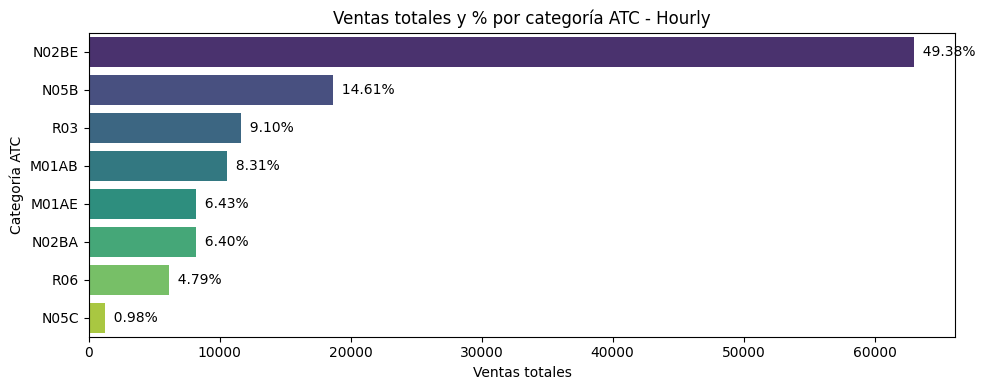


=== Daily - Ranking por categoría (totales y porcentajes) ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98


C:\Users\AnaGu\AppData\Local\Temp\ipykernel_25372\387847314.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totals.values, y=totals.index, palette="viridis")


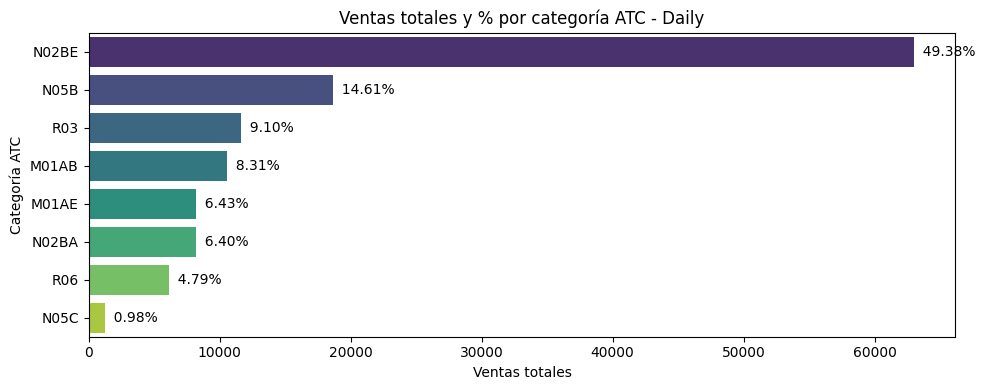


=== Weekly - Ranking por categoría (totales y porcentajes) ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98


C:\Users\AnaGu\AppData\Local\Temp\ipykernel_25372\387847314.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totals.values, y=totals.index, palette="viridis")


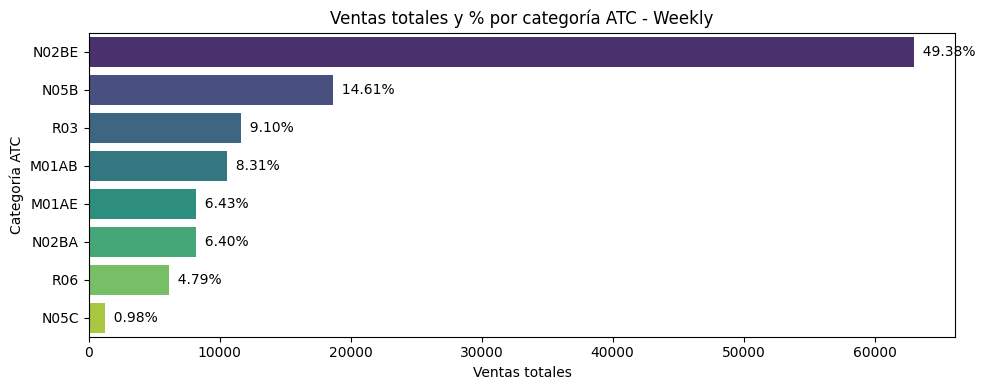


=== Monthly - Ranking por categoría (totales y porcentajes) ===
       Ventas totales  Porcentaje (%)
N02BE       62477.945           49.36
N05B        18348.300           14.49
R03         11737.250            9.27
M01AB       10499.440            8.29
M01AE        8156.000            6.44
N02BA        8051.459            6.36
R06          6066.380            4.79
N05C         1249.000            0.99


C:\Users\AnaGu\AppData\Local\Temp\ipykernel_25372\387847314.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=totals.values, y=totals.index, palette="viridis")


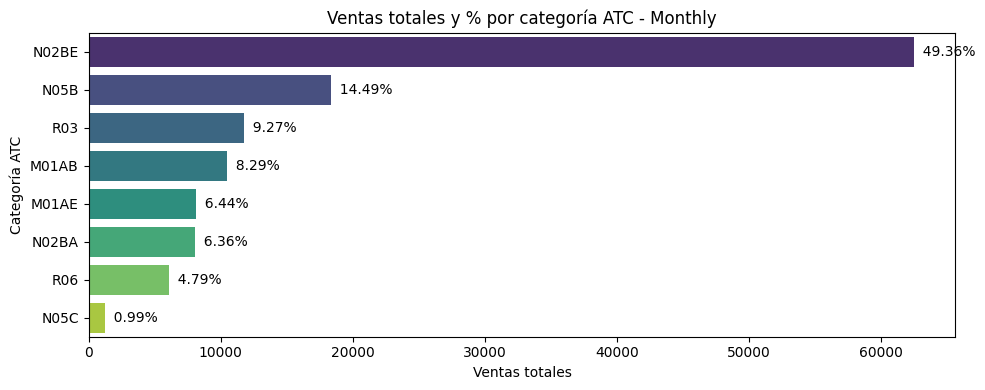

In [24]:
# Ranking de categorías (ventas y % en el mismo gráfico)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columnas ATC (ajusta si cambian)
atc_cols = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for name, df in datasets.items():
    cols_present = [c for c in atc_cols if c in df.columns]
    if not cols_present:
        print(f"[{name}] No hay columnas ATC presentes. Se omite.")
        continue

    # Totales y porcentajes
    totals = df[cols_present].sum().sort_values(ascending=False)
    total_sum = totals.sum()
    if total_sum == 0:
        print(f"[{name}] La suma total es 0. Se omite gráfico.")
        continue
    pct = (totals / total_sum * 100).round(2)

    # DataFrame para mostrar
    ranking_df = pd.DataFrame({
        "Ventas totales": totals,
        "Porcentaje (%)": pct
    })

    print(f"\n=== {name} - Ranking por categoría (totales y porcentajes) ===")
    print(ranking_df.to_string())

    # Gráfico único con totales y etiqueta de porcentaje
    plt.figure(figsize=(10, max(4, 0.45 * len(totals))))
    sns.barplot(x=totals.values, y=totals.index, palette="viridis")
    plt.title(f"Ventas totales y % por categoría ATC - {name}")
    plt.xlabel("Ventas totales")
    plt.ylabel("Categoría ATC")

    # Añadir etiqueta de porcentaje al final de cada barra
    for i, (v, p) in enumerate(zip(totals.values, pct.values)):
        plt.text(v, i, f"  {p:.2f}%", va="center")

    plt.tight_layout()
    plt.show()

Represento en una gráfica todas las ventas que tengo por cada grupo ATC.

#### **2.3 - Medidas de tendencia y dispersión**

Calculamos para cada dataset (Hourly, Daily, Weekly, Monthly) y para cada categoría (M01AB, M01AE, N02BA, N02BE, N05B, N05C, R03, R06) las medidas clásicas de tendencia central y dispersión:
- Media
- Mediana
- Desviación estándar
- Mínimo y Máximo
- IQR (Rango intercuartílico = Q3 - Q1)

Después detectamos los outliers por dos métodos:
- IQR (rango intercuartílico)
- Z-score (desviaciones estándar)

In [25]:
import pandas as pd
import numpy as np

# Lista de categorías
drugs = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Filtrar columnas que existan en el dataset
    cols_presentes = [c for c in drugs if c in df.columns]
    
    # Calcular medidas de tendencia y dispersión
    stats_df = pd.DataFrame(index=cols_presentes)
    stats_df["Media"] = df[cols_presentes].mean()
    stats_df["Mediana"] = df[cols_presentes].median()
    stats_df["Desviación estándar"] = df[cols_presentes].std()
    stats_df["Mínimo"] = df[cols_presentes].min()
    stats_df["Máximo"] = df[cols_presentes].max()
    
    # Calcular IQR
    q1 = df[cols_presentes].quantile(0.25)
    q3 = df[cols_presentes].quantile(0.75)
    iqr = q3 - q1
    stats_df["IQR"] = iqr
    
    print("\nMedidas de tendencia y dispersión:")
    print(stats_df.round(2))
    
    # --------------------------
    # Detección de outliers por IQR
    # --------------------------
    outliers_iqr = {}
    for col in cols_presentes:
        lower_bound = q1[col] - 1.5 * iqr[col]
        upper_bound = q3[col] + 1.5 * iqr[col]
        outliers_iqr[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    print("\nOutliers detectados por IQR:")
    for col, vals in outliers_iqr.items():
        print(f"{col}: {len(vals)} valores atípicos")
    
    # --------------------------
    # Detección de outliers por Z-score
    # --------------------------
    outliers_zscore = {}
    for col in cols_presentes:
        z_scores = (df[col] - stats_df.loc[col, "Media"]) / stats_df.loc[col, "Desviación estándar"]
        outliers_zscore[col] = df[np.abs(z_scores) > 3][col]
    
    print("\nOutliers detectados por Z-score (>3 desviaciones estándar):")
    for col, vals in outliers_zscore.items():
        print(f"{col}: {len(vals)} valores atípicos")


=== Hourly ===

Medidas de tendencia y dispersión:
       Media  Mediana  Desviación estándar  Mínimo  Máximo   IQR
M01AB   0.21      0.0                 0.56     0.0     7.0  0.00
M01AE   0.16      0.0                 0.42     0.0     6.0  0.00
N02BA   0.16      0.0                 0.45     0.0     6.5  0.00
N02BE   1.25      0.0                 2.39     0.0    29.0  1.88
N05B    0.37      0.0                 0.93     0.0    15.0  0.00
N05C    0.02      0.0                 0.22     0.0     6.0  0.00
R03     0.23      0.0                 1.24     0.0    25.0  0.00
R06     0.12      0.0                 0.39     0.0     5.0  0.00

Outliers detectados por IQR:
M01AB: 8899 valores atípicos
M01AE: 9515 valores atípicos
N02BA: 7446 valores atípicos
N02BE: 4189 valores atípicos
N05B: 10558 valores atípicos
N05C: 864 valores atípicos
R03: 3412 valores atípicos
R06: 5285 valores atípicos

Outliers detectados por Z-score (>3 desviaciones estándar):
M01AB: 1681 valores atípicos
M01AE: 920 valore

### <u><span style="background-color: #00AAFF;">__3 - Visualizaciones principales__</span></u>  

In [26]:
# Importamos librerías para hacer las gráficas
import matplotlib.pyplot as plt
import seaborn as sns

#### **3.1 - Series temporales**  

**3.1.1 - Series temporales de Total sales por granularidad**  

Objetivo: Ver la evolución en el tiempo (tendencia, estacionalidad, caídas).  

Interpretación:
- Tendencia positiva/negativa: Cambios sostenidos en el tiempo (crecimiento o caída de ventas).  

- Estacionalidad: Picos y valles que se repiten periódicamente (semanal, mensual, anual).
- Rupturas: Descensos o aumentos bruscos que coincidan con eventos externos (cambios de política de precios, pandemias, etc.).

En este caso, la tendencia general a nivel mensual y semanal sugiere un mercado en expansión porque se observan periodos de crecimiento.

En los datos diarios o por hora, hay demasiado ruido porque fluntúan mucho las ventas.

[OK] Figura guardada: ..\docs\plots\ts_total_sales_hourly.png


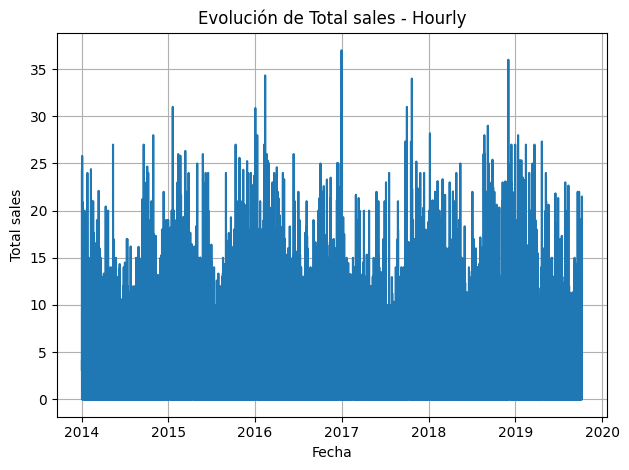

[OK] Figura guardada: ..\docs\plots\ts_total_sales_daily.png


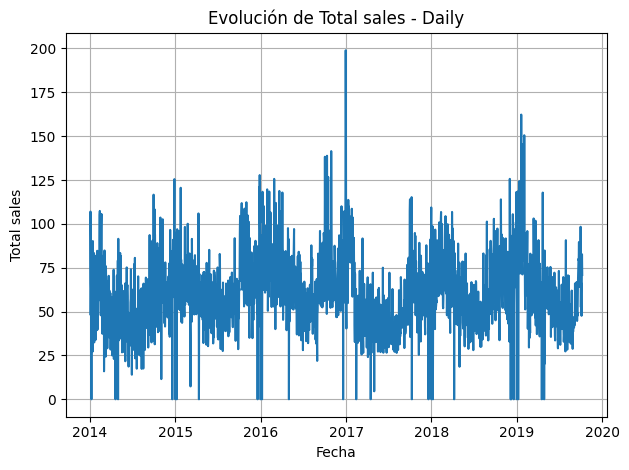

[OK] Figura guardada: ..\docs\plots\ts_total_sales_weekly.png


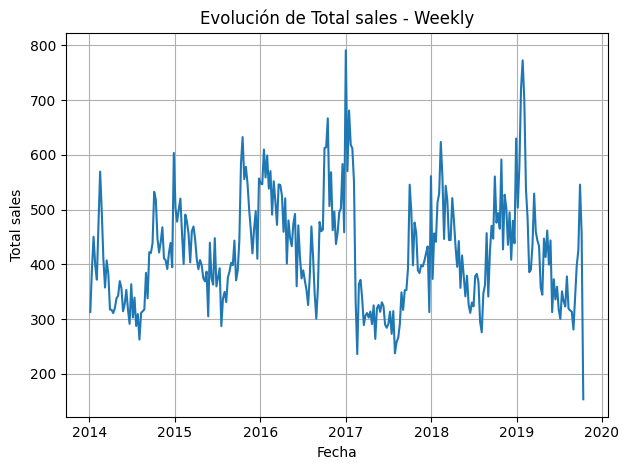

[OK] Figura guardada: ..\docs\plots\ts_total_sales_monthly.png


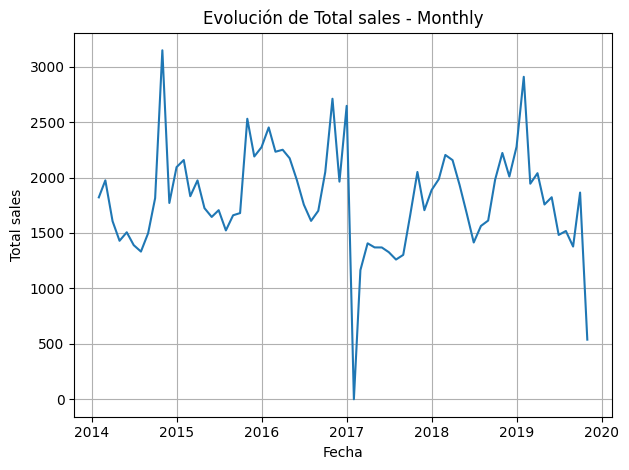

In [27]:
# -----------------------------------------
# 3.1.1 - Series temporales de Total sales por granularidad
# -----------------------------------------

for name, df in datasets.items():
    plt.figure()
    plt.plot(df['datum'], df['Total sales'])
    plt.title(f"Evolución de Total sales - {name}")
    plt.grid(True)
    plt.xlabel("Fecha")
    plt.ylabel("Total sales")
    plt.tight_layout()
    savefig(f"ts_total_sales_{name.lower()}")
    plt.show()

Forma interactiva:

In [28]:
from ipywidgets import interact, IntSlider, Dropdown, SelectionRangeSlider, Layout
import matplotlib.pyplot as plt

# Crea un control de rango de fechas en función del dataset seleccionado
def plot_timeseries(dataset_name):
    df = datasets[dataset_name].copy()
    df = df.dropna(subset=['datum', 'Total sales']).sort_values('datum')
    if df.empty:
        print("No hay datos para graficar.")
        return
    
    # slider de rango por índice temporal
    def _inner(idx_range):
        i0, i1 = idx_range
        df_sel = df.iloc[i0:i1+1]
        plt.figure()
        plt.plot(df_sel['datum'], df_sel['Total sales'])
        plt.title(f"Evolución de Total sales - {dataset_name}")
        plt.xlabel("Fecha")
        plt.ylabel("Total sales")
        plt.tight_layout()
        plt.show()
    
    idx_slider = SelectionRangeSlider(
        options=[(d.strftime('%Y-%m-%d %H:%M'), i) for i, d in enumerate(df['datum'])],
        index=(0, len(df)-1),
        description='Rango',
        layout=Layout(width='95%')
    )
    interact(_inner, idx_range=idx_slider)

interact(plot_timeseries, dataset_name=Dropdown(options=list(datasets.keys()), description='Dataset'));

interactive(children=(Dropdown(description='Dataset', options=('Hourly', 'Daily', 'Weekly', 'Monthly'), value=…

Con Plotly:

In [29]:
import plotly.express as px

for name, df in datasets.items():
    d = df.dropna(subset=['datum', 'Total sales']).sort_values('datum')
    if d.empty:
        print(f"[{name}] sin datos para serie temporal.")
        continue
    fig = px.line(d, x='datum', y='Total sales',
                  title=f"Evolución de Total sales - {name}",
                  labels={'datum': 'Fecha', 'Total sales': 'Total sales'})
    fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
    fig.show()

Vemos que las ventas no son estables sino que tienen picos de subida y bajada, llegando incluso a verse un patrón o estacionalidad. Los picos altos como el situado antes del inicio de 2017 indican un evento atípico. La línea no es suave (ventas constantes) sino que es dentada por tener mucha variación diaria.

**3.1.2 - Tendencia suavizada con media móvil por granularidad**

Como la gráficas del punto anterior se ven muy ruidosas, vamos a representarla con la media móvil (según periodos, por ejemplo, 30 días en Monthly) que me ayuda a ver ciclos y tendencias evitando el ruido diario. Ideal para análisis de mediano plazo.

[OK] Figura guardada: ..\docs\plots\ts_smooth_hourly.png


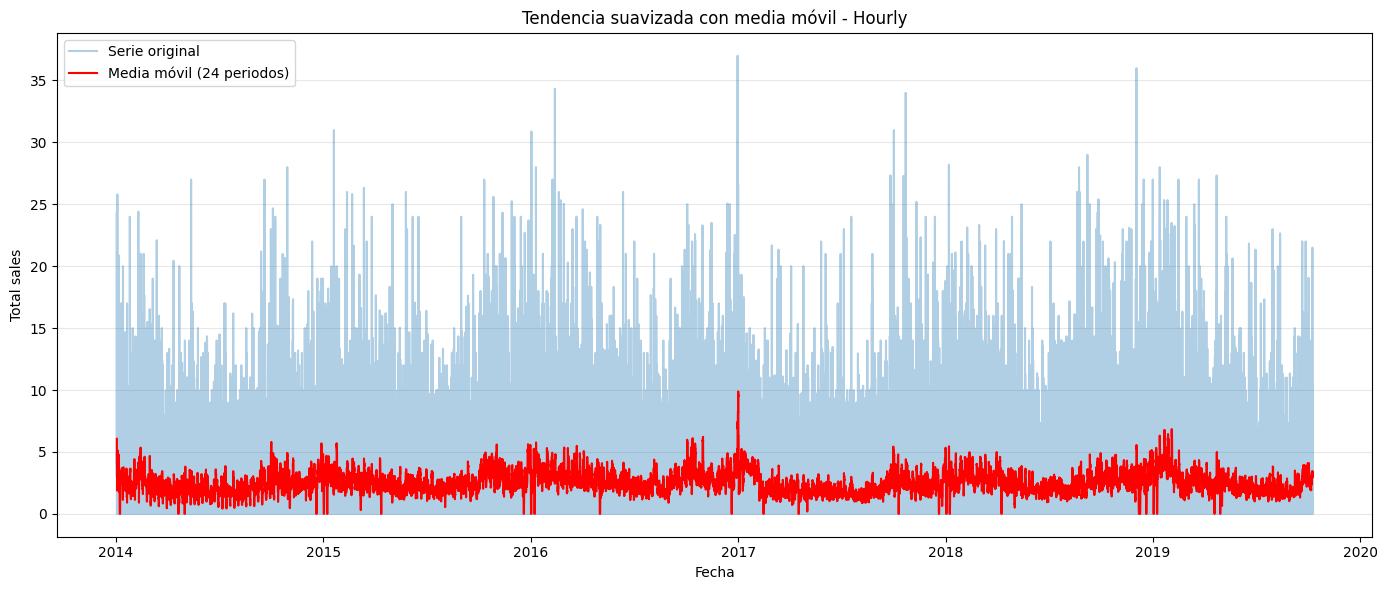

[OK] Figura guardada: ..\docs\plots\ts_smooth_daily.png


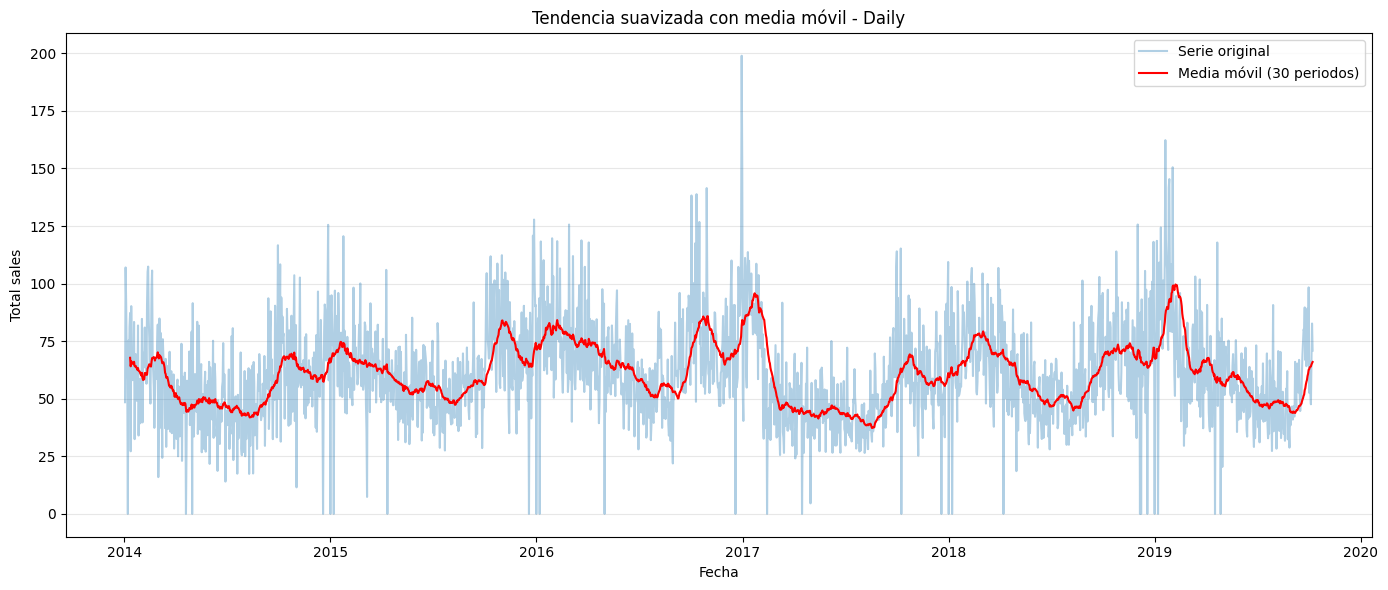

[OK] Figura guardada: ..\docs\plots\ts_smooth_weekly.png


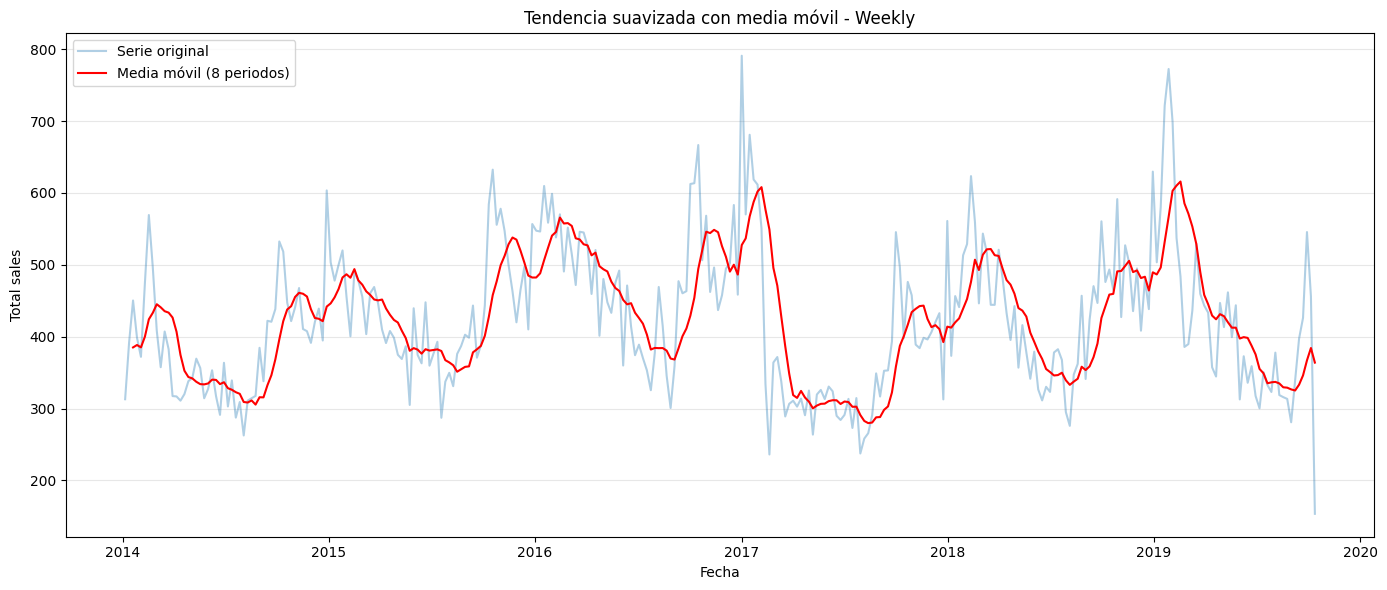

[OK] Figura guardada: ..\docs\plots\ts_smooth_monthly.png


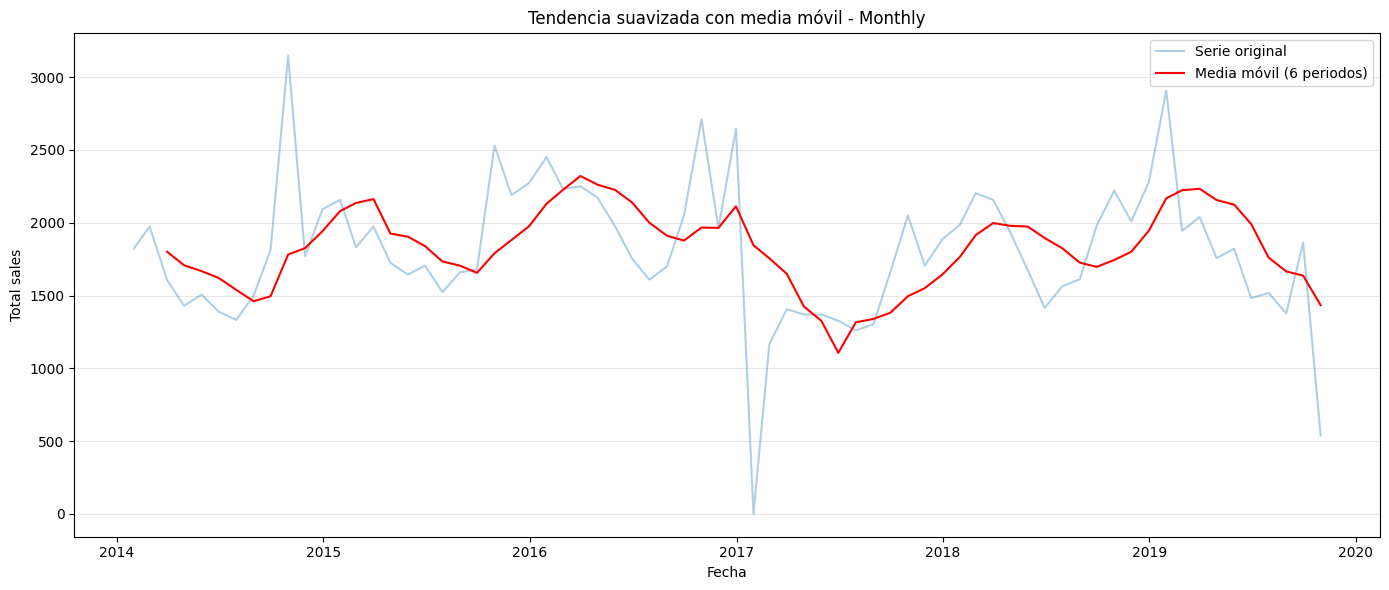

In [30]:
# -----------------------------------------
# 3.1.2 - Tendencia suavizada con media móvil por granularidad
# -----------------------------------------

# ================================
# Tendencia suavizada con media móvil por granularidad
#   - Hourly: 24 periodos (~1 día)
#   - Daily:  30 periodos (~1 mes)
#   - Weekly: 8 periodos  (~2 meses)
#   - Monthly: 6 periodos (~6 meses)
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ventanas por granularidad (en número de filas/periodos)
ma_windows = {
    "Hourly": 24,
    "Daily": 30,
    "Weekly": 8,
    "Monthly": 6
}

# Si falta 'Total sales', la calculamos a partir de las categorías disponibles
drugs = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for name, df in datasets.items():
    if "datum" not in df.columns:
        print(f"[{name}] No existe la columna 'datum'. Se omite 3.1.5.")
        continue

    d = df.copy()
    d["datum"] = pd.to_datetime(d["datum"], errors="coerce")
    d = d.dropna(subset=["datum"]).sort_values("datum")

    # Asegurar Total sales
    if "Total sales" not in d.columns:
        cols_present = [c for c in drugs if c in d.columns]
        if not cols_present:
            print(f"[{name}] No hay columnas de categorías para construir 'Total sales'. Se omite 3.1.5.")
            continue
        d["Total sales"] = d[cols_present].sum(axis=1, skipna=True)

    # Elegir ventana
    window = ma_windows.get(name, 30)  # por defecto 30 si no está mapeado
    if len(d) < max(3, window):
        print(f"[{name}] Datos insuficientes para una media móvil de {window} periodos. Se omite.")
        continue

    # Calcular media móvil (centrada = False para mantener causalidad)
    d["Rolling_MA"] = d["Total sales"].rolling(window=window, min_periods=max(3, window//3)).mean()

    # Plot
    plt.figure(figsize=(14, 6))
    sns.lineplot(x="datum", y="Total sales", data=d, label="Serie original", alpha=0.35)
    sns.lineplot(x="datum", y="Rolling_MA", data=d, label=f"Media móvil ({window} periodos)", color="red")
    plt.title(f"Tendencia suavizada con media móvil - {name}")
    plt.xlabel("Fecha")
    plt.ylabel("Total sales")
    plt.grid(True, axis="y", alpha=0.3)
    plt.legend()
    plt.tight_layout()
    savefig(f"ts_smooth_{name.lower()}")
    plt.show()

**3.1.3 - Tendencia anual agregada (Monthly por año)**  

Objetivo: Detectar cambios en el volumen total por año.  

Interpretación:
- Tendencia creciente → mercado en expansión o aumento de stock disponible.
- Tendencia decreciente → caída de demanda, competencia, desabastecimiento.
- Años con caídas abruptas → investigar causas específicas.

En este caso, la suma anual de ventas muestra una tendencia globalmente creciente, con ligeros descensos en algunos años que podrían deberse a factores externos (cambios regulatorios, competidores, ajustes de stock).

El patrón ascendente respalda una demanda sostenida.

[OK] Figura guardada: ..\docs\plots\ts_monthly_year_sum.png


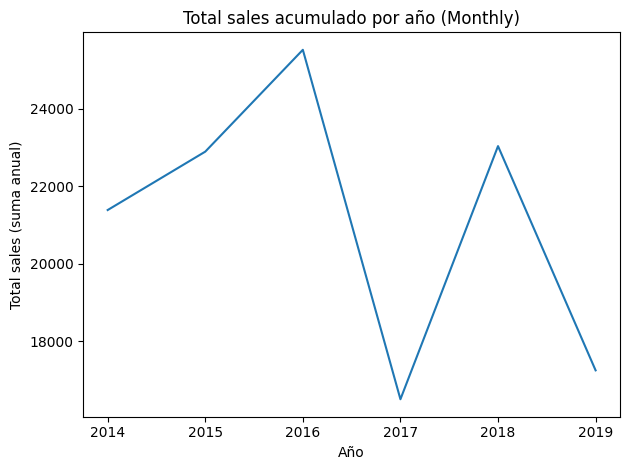

In [31]:
# -----------------------------------------
# 3.1.3 - Tendencia anual agregada (Montly por año)
# -----------------------------------------

# Monthly: línea por año para ver tendencia anual agregada
if "Monthly" in datasets:
    df = datasets["Monthly"].copy()
    monthly_year = df.groupby('Year', as_index=False)['Total sales'].sum()
    plt.figure()
    plt.plot(monthly_year['Year'], monthly_year['Total sales'])
    plt.title("Total sales acumulado por año (Monthly)")
    plt.xlabel("Año")
    plt.ylabel("Total sales (suma anual)")
    plt.tight_layout()
    savefig("ts_monthly_year_sum")
    plt.show()

Forma interactiva:

In [32]:
def plot_monthly_year(min_year=None, max_year=None):
    if "Monthly" not in datasets:
        print("No existe dataset 'Monthly'.")
        return
    df = datasets["Monthly"].copy()
    if 'Year' not in df.columns:
        df['Year'] = df['datum'].dt.year
    agg = df.groupby('Year', as_index=False)['Total sales'].sum().sort_values('Year')
    if min_year is not None:
        agg = agg[agg['Year'] >= int(min_year)]
    if max_year is not None:
        agg = agg[agg['Year'] <= int(max_year)]
    plt.figure()
    plt.plot(agg['Year'], agg['Total sales'])
    plt.title("Total sales acumulado por año (Monthly)")
    plt.xlabel("Año")
    plt.ylabel("Total sales (suma anual)")
    plt.tight_layout()
    plt.show()

# Construimos sliders a partir de años detectados
if "Monthly" in datasets:
    dfm = datasets["Monthly"].copy()
    yrs = sorted((dfm['datum'].dt.year).dropna().unique())
    if len(yrs) > 0:
        interact(
            plot_monthly_year,
            min_year=IntSlider(value=int(min(yrs)), min=int(min(yrs)), max=int(max(yrs)), step=1, description='Año min'),
            max_year=IntSlider(value=int(max(yrs)), min=int(min(yrs)), max=int(max(yrs)), step=1, description='Año max')
        )
    else:
        plot_monthly_year()
else:
    plot_monthly_year()

interactive(children=(IntSlider(value=2014, description='Año min', max=2019, min=2014), IntSlider(value=2019, …

Con Plotly:

In [33]:
import plotly.express as px

if "Monthly" in datasets:
    d = datasets["Monthly"].copy()
    d['datum'] = pd.to_datetime(d['datum'], errors='coerce')
    if 'Year' not in d.columns:
        d['Year'] = d['datum'].dt.year
    agg = d.groupby('Year', as_index=False)['Total sales'].sum().sort_values('Year')
    if agg.empty:
        print("[Monthly] sin datos para tendencia anual.")
    else:
        fig = px.line(agg, x='Year', y='Total sales', markers=True,
                      title="Total sales acumulado por año (Monthly)",
                      labels={'Year': 'Año', 'Total sales': 'Total sales (suma anual)'})
        fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
        fig.show()
else:
    print("No existe dataset 'Monthly'.")

**3.1.4 - Serie temporal semanal (Weekly)**   

Objetivo: Observar tendencia en periodos de 7 días, reduciendo ruido diario.  

Interpretación:
- Filtra la variabilidad diaria y hace más visible la tendencia general y ciclos estacionales largos.
- Es útil para decisiones estratégicas de medio plazo.

En este caso, el suavizado semanal confirma la tendencia general observada en el mensual, reduciendo el ruido de los datos diarios.

Es útil para análisis de planificación de inventario y producción.

[OK] Figura guardada: ..\docs\plots\ts_weekly_total_sales.png


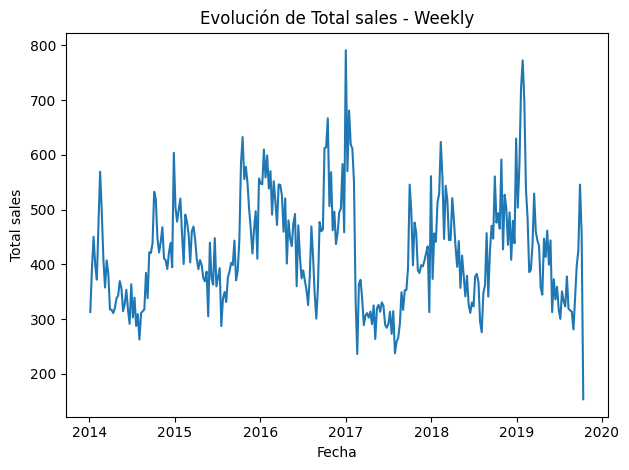

In [34]:
# -----------------------------------------
# 3.1.4 - Serie temporal semanal (Weekly)
# -----------------------------------------

# Weekly: línea simple para ver tendencia semanal
if "Weekly" in datasets:
    df = datasets["Weekly"].copy()
    plt.figure()
    plt.plot(df['datum'], df['Total sales'])
    plt.title("Evolución de Total sales - Weekly")
    plt.xlabel("Fecha")
    plt.ylabel("Total sales")
    plt.tight_layout()
    savefig("ts_weekly_total_sales")
    plt.show()

Forma interactiva:

In [35]:
def plot_weekly(idx_range=None):
    if "Weekly" not in datasets:
        print("No existe dataset 'Weekly'.")
        return
    df = datasets["Weekly"].copy().dropna(subset=['datum', 'Total sales']).sort_values('datum')
    if df.empty:
        print("No hay datos para graficar.")
        return
    
    if idx_range is None:
        idx_range = (0, len(df)-1)
    i0, i1 = idx_range
    df_sel = df.iloc[i0:i1+1]
    plt.figure()
    plt.plot(df_sel['datum'], df_sel['Total sales'])
    plt.title("Evolución de Total sales - Weekly")
    plt.xlabel("Fecha")
    plt.ylabel("Total sales")
    plt.tight_layout()
    plt.show()

if "Weekly" in datasets and len(datasets["Weekly"])>0:
    dfw = datasets["Weekly"].copy().dropna(subset=['datum']).sort_values('datum')
    idx_slider_w = SelectionRangeSlider(
        options=[(d.strftime('%Y-%m-%d'), i) for i, d in enumerate(dfw['datum'])],
        index=(0, len(dfw)-1),
        description='Rango',
        layout=Layout(width='95%')
    )
    interact(lambda idx_range: plot_weekly(idx_range), idx_range=idx_slider_w)
else:
    plot_weekly()


interactive(children=(SelectionRangeSlider(description='Rango', index=(0, 301), layout=Layout(width='95%'), op…

Con plotly:

In [36]:
import plotly.express as px

if "Weekly" in datasets:
    d = datasets["Weekly"].copy()
    d['datum'] = pd.to_datetime(d['datum'], errors='coerce')
    d = d.dropna(subset=['datum', 'Total sales']).sort_values('datum')
    if d.empty:
        print("[Weekly] sin datos para serie semanal.")
    else:
        fig = px.line(d, x='datum', y='Total sales',
                      title="Evolución de Total sales - Weekly",
                      labels={'datum': 'Fecha', 'Total sales': 'Total sales'})
        fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
        fig.show()
else:
    print("No existe dataset 'Weekly'.")

**3.1.5 - Serie temporal Hourly promedio por hora**

Objetivo: Detectar patrón horario de ventas.  

Interpretación:

- Horas pico → mayor concentración de compras entre 9-11 h para farmacias abiertas y, en menor medida, primeras horas de la tarde.
- Horas bajas → cierres nocturnos o falta de stock.
- Patrón bimodal → ventas concentradas en dos franjas (mañana y tarde).

Con el boxplot vemos que hay más variabilidad en el número de ventas entre las 7 y 21h, mientras que durante la noche y la madrugada suelen ser estables.

[OK] Figura guardada: ..\docs\plots\hourly_mean_bar.png


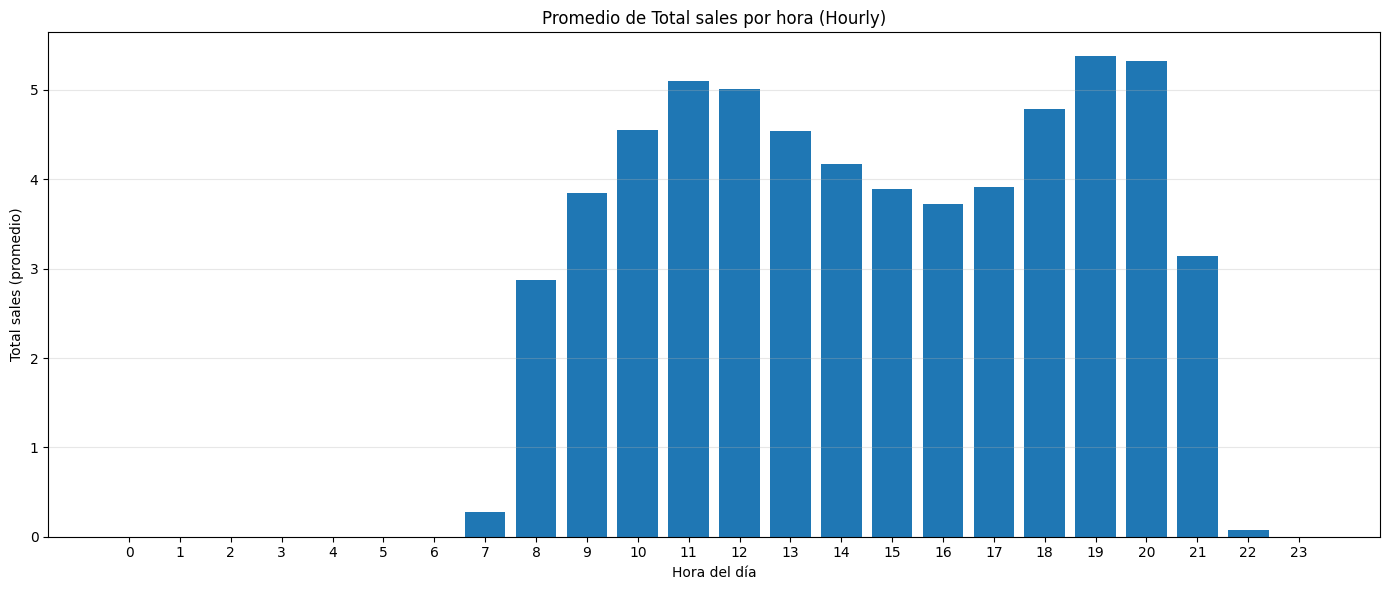

[OK] Figura guardada: ..\docs\plots\hourly_mean_line.png


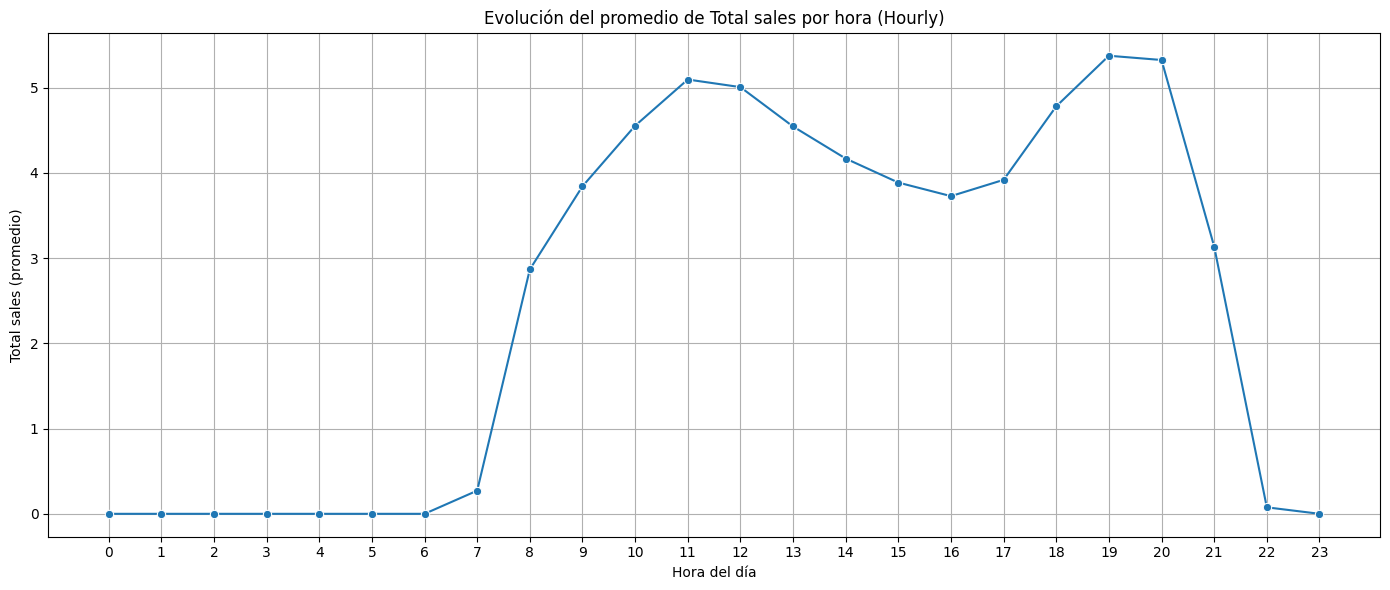

[OK] Figura guardada: ..\docs\plots\hourly_boxplot.png


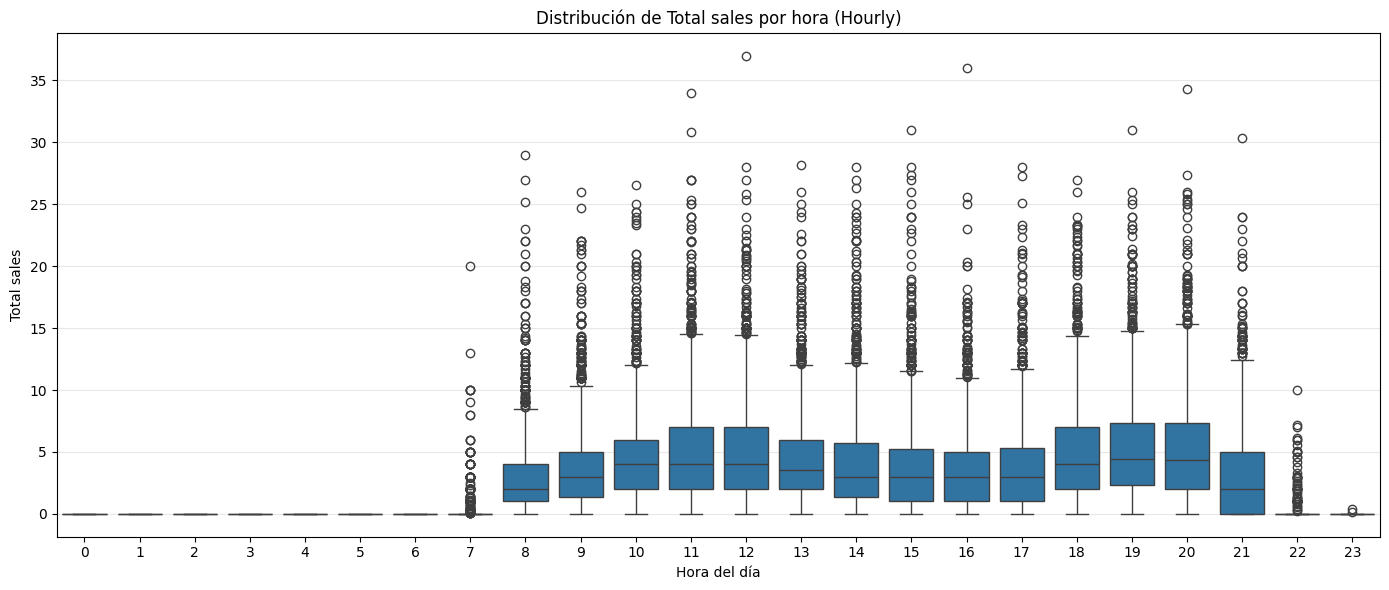

In [37]:
# -----------------------------------------
# 3.1.5 - Serie temporal Hourly promedio por hora
# -----------------------------------------

# ................................
# Serie temporal Hourly (unificado)
#   a) Barra: promedio por hora
#   b) Línea: promedio por hora
#   c) Boxplot: distribución por hora
# ................................
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if "Hourly" in datasets and "Hour" in datasets["Hourly"].columns:
    dfh = datasets["Hourly"].copy()

    # Asegurar tipos correctos y orden temporal (por si lo necesitas en otros gráficos)
    dfh["datum"] = pd.to_datetime(dfh["datum"], errors="coerce")
    dfh = dfh.dropna(subset=["datum", "Total sales"]).sort_values("datum")

    # ---- a) PROMEDIO POR HORA (BARRA) ----
    hourly_mean = dfh.groupby("Hour", as_index=False)["Total sales"].mean()

    plt.figure(figsize=(14, 6))
    plt.bar(hourly_mean["Hour"], hourly_mean["Total sales"])
    plt.title("Promedio de Total sales por hora (Hourly)")
    plt.xticks(ticks=range(0, 24, 1))
    plt.xlabel("Hora del día")
    plt.ylabel("Total sales (promedio)")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    savefig("hourly_mean_bar")
    plt.show()

    # ---- b) PROMEDIO POR HORA (LÍNEA) ----
    plt.figure(figsize=(14, 6))
    sns.lineplot(x="Hour", y="Total sales", data=hourly_mean, marker="o")
    plt.title("Evolución del promedio de Total sales por hora (Hourly)")
    plt.xticks(ticks=range(0, 24, 1))
    plt.xlabel("Hora del día")
    plt.ylabel("Total sales (promedio)")
    plt.grid(True)
    plt.tight_layout()
    savefig("hourly_mean_line")
    plt.show()

    # ---- c) DISTRIBUCIÓN POR HORA (BOXPLOT) ----
    plt.figure(figsize=(14, 6))
    sns.boxplot(x="Hour", y="Total sales", data=dfh)
    plt.title("Distribución de Total sales por hora (Hourly)")
    plt.xticks(ticks=range(0, 24, 1))
    plt.xlabel("Hora del día")
    plt.ylabel("Total sales")
    plt.grid(True, axis="y", alpha=0.3)
    plt.tight_layout()
    savefig("hourly_boxplot")   
    plt.show()
else:
    print("No se encontró el dataset 'Hourly' o la columna 'Hour'. Se omite 3.1.4.")

Con Plotly:

In [38]:
# ................................
# Serie temporal Hourly (Plotly)
#   a) Barra: promedio por hora
#   b) Línea: promedio por hora
#   c) Boxplot: distribución por hora
# ................................
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

if "Hourly" in datasets and "Hour" in datasets["Hourly"].columns:
    dfh = datasets["Hourly"].copy()
    dfh["datum"] = pd.to_datetime(dfh["datum"], errors="coerce")
    dfh = dfh.dropna(subset=["datum", "Total sales", "Hour"])
    dfh = dfh.sort_values("datum")

    # ---- a) PROMEDIO POR HORA (BARRA) ----
    hourly_mean = dfh.groupby("Hour", as_index=False)["Total sales"].mean()
    fig_bar = px.bar(
        hourly_mean,
        x="Hour", y="Total sales",
        title="Promedio de Total sales por hora (Hourly)",
        labels={"Hour": "Hora del día", "Total sales": "Total sales (promedio)"}
    )
    fig_bar.update_xaxes(dtick=1)
    fig_bar.update_layout(hovermode="x unified", margin=dict(l=40, r=20, t=60, b=40))
    fig_bar.show()

    # ---- b) PROMEDIO POR HORA (LÍNEA) ----
    fig_line = px.line(
        hourly_mean,
        x="Hour", y="Total sales",
        markers=True,
        title="Evolución del promedio de Total sales por hora (Hourly)",
        labels={"Hour": "Hora del día", "Total sales": "Total sales (promedio)"}
    )
    fig_line.update_xaxes(dtick=1)
    fig_line.update_layout(hovermode="x unified", margin=dict(l=40, r=20, t=60, b=40))
    fig_line.show()

    # ---- c) DISTRIBUCIÓN POR HORA (BOXPLOT) ----
    fig_box = px.box(
        dfh,
        x="Hour", y="Total sales",
        title="Distribución de Total sales por hora (Hourly)",
        labels={"Hour": "Hora del día", "Total sales": "Total sales"}
    )
    fig_box.update_xaxes(dtick=1)
    fig_box.update_layout(hovermode="x unified", margin=dict(l=40, r=20, t=60, b=40))
    fig_box.show()
else:
    print("No se encontró el dataset 'Hourly' o la columna 'Hour'. Se omite 3.1.4 (Plotly).")

#### **3.2 - Distribuciones** 

**3.2.1 - Histogramas de Total sales**   

Objetivo: Analizar la distribución de las ventas en cada granularidad.  

Interpretación:

- Sesgo a la derecha (muchas ventas bajas, pocas ventas altas) → común en datos de consumo.
- Sesgo a la izquierda (ventas altas la mayoría del tiempo) → productos muy demandados o pocas referencias con alto volumen.  
- Distribución multimodal → podrían existir varios segmentos de ventas diferenciados.4

En este caso, la distribución de Total sales en todas las granularidades está sesgada a la derecha: la mayoría de los registros tienen volúmenes bajos o medios, con pocos casos de ventas muy altas.

Esta forma es habitual en ventas farmacéuticas, donde unos pocos eventos o clientes concentran grandes volúmenes.

[OK] Figura guardada: ..\docs\plots\hist_total_sales_hourly.png


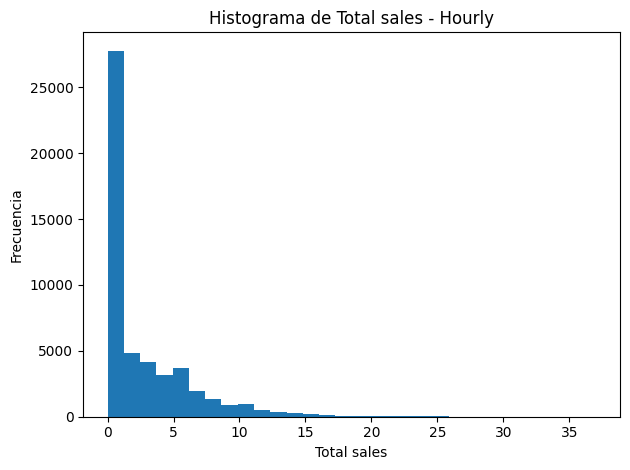

[OK] Figura guardada: ..\docs\plots\hist_total_sales_daily.png


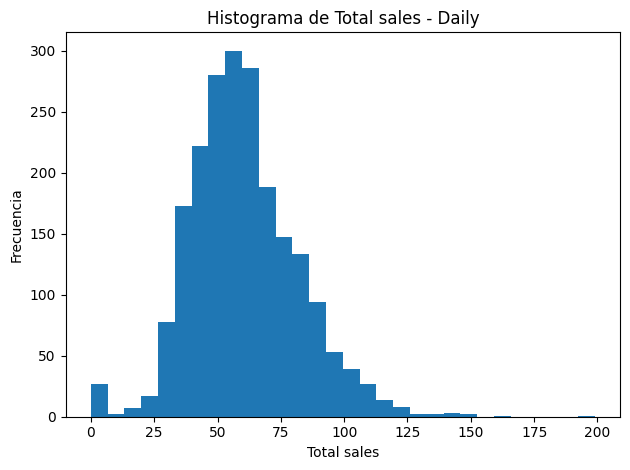

[OK] Figura guardada: ..\docs\plots\hist_total_sales_weekly.png


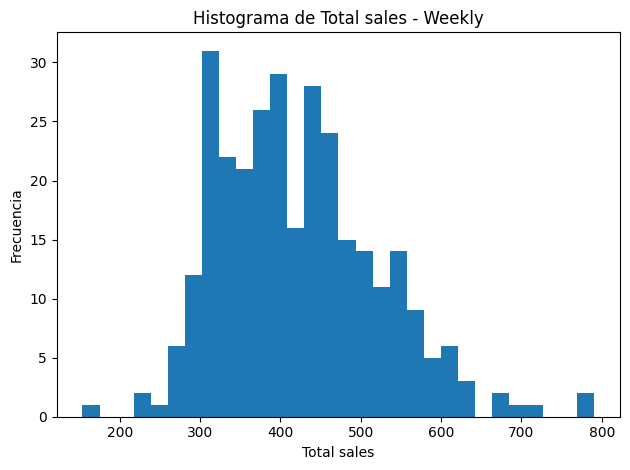

[OK] Figura guardada: ..\docs\plots\hist_total_sales_monthly.png


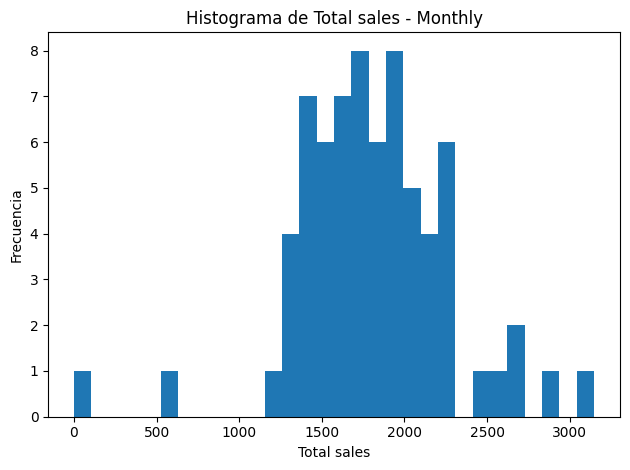

In [39]:
# Histogramas de Total sales
for name, df in datasets.items():
    plt.figure()
    plt.hist(df['Total sales'].dropna(), bins=30)
    plt.title(f"Histograma de Total sales - {name}")
    plt.xlabel("Total sales")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    savefig(f"hist_total_sales_{name.lower()}")
    plt.show()

Forma interactiva:

In [40]:
import numpy as np
from ipywidgets import (
    interact, IntSlider, FloatSlider, Dropdown, SelectionRangeSlider, Layout, Checkbox
)

def plot_hist(dataset_name, bins, min_val, max_val, log_scale):
    df = datasets[dataset_name].copy()
    x = df['Total sales'].dropna()
    if min_val is not None:
        x = x[x >= min_val]
    if max_val is not None:
        x = x[x <= max_val]
    plt.figure()
    plt.hist(x, bins=bins)
    plt.title(f"Histograma de Total sales - {dataset_name}")
    plt.xlabel("Total sales")
    plt.ylabel("Frecuencia (log)" if log_scale else "Frecuencia")
    if log_scale:
        plt.yscale('log')
    plt.tight_layout()
    plt.show()

# Sugerimos límites según todo el conjunto
all_vals = pd.concat([datasets[k]['Total sales'] for k in datasets if 'Total sales' in datasets[k]], axis=0).dropna()
min_default = float(np.nanpercentile(all_vals, 1)) if len(all_vals) else 0.0
max_default = float(np.nanpercentile(all_vals, 99)) if len(all_vals) else 1.0

interact(
    plot_hist,
    dataset_name=Dropdown(options=list(datasets.keys()), description='Dataset'),
    bins=IntSlider(value=30, min=10, max=120, step=5, description='Bins'),
    min_val=FloatSlider(value=min_default, min=min_default, max=max_default, step=(max_default-min_default)/100, description='Min'),
    max_val=FloatSlider(value=max_default, min=min_default, max=max_default, step=(max_default-min_default)/100, description='Max'),
    log_scale=Checkbox(value=False, description='Escala log Y')
);


interactive(children=(Dropdown(description='Dataset', options=('Hourly', 'Daily', 'Weekly', 'Monthly'), value=…

Con Plotly:

In [41]:
import numpy as np
import plotly.express as px

for name, df in datasets.items():
    x = df['Total sales'].dropna()
    if x.empty:
        print(f"[{name}] sin datos para histograma.")
        continue
    # Recorte opcional de colas para visualizar mejor (percentiles 1–99)
    p1, p99 = np.nanpercentile(x, [1, 99])
    x_f = x[(x >= p1) & (x <= p99)]
    fig = px.histogram(x_f, nbins=30,
                       title=f"Histograma de Total sales - {name}",
                       labels={'value': 'Total sales', 'count': 'Frecuencia'})
    fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
    fig.show()

**3.2.2 - Boxplot por mes (Daily)**  

Objetivo: Ver variación intra-anual y estacionalidad mensual.  

Interpretación:
- Meses con medianas más altas → alta demanda.
- Mayor rango intercuartílico (IQR) → ventas muy variables ese mes.
- Outliers extremos → eventos puntuales con ventas inusuales.

En este caso, se detectan diferencias claras entre meses: algunos concentran medianas más altas (posible demanda estacional), mientras que otros muestran mayor dispersión, posiblemente por promociones o reposiciones irregulares.

Meses con outliers positivos coinciden con picos ya detectados en el análisis de fechas.

[OK] Figura guardada: ..\docs\plots\box_month_daily.png


<Figure size 640x480 with 0 Axes>

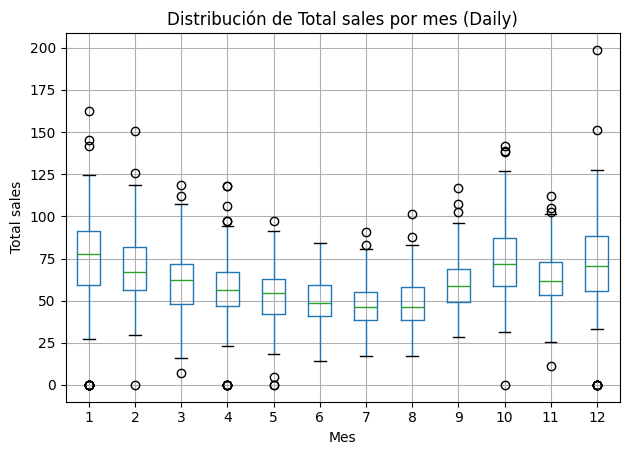

In [42]:
# -----------------------------------------
# 3.2.2 - Boxplot por mes (Daily)
# -----------------------------------------

# Boxplot mensual - Daily: boxplot por mes (1-12) para ver estacionalidad intra-anual
if "Daily" in datasets:
    df = datasets["Daily"].copy()
    plt.figure()
    df.boxplot(column='Total sales', by='Month')
    plt.title("Distribución de Total sales por mes (Daily)")
    plt.suptitle("")
    plt.xlabel("Mes")
    plt.ylabel("Total sales")
    plt.tight_layout()
    savefig("box_month_daily")
    plt.show()

*No tiene forma interactiva porque sólo es una gráfica fija.*

Con Plotly:

In [43]:
import plotly.express as px

if "Daily" in datasets:
    d = datasets["Daily"].copy()
    d['datum'] = pd.to_datetime(d['datum'], errors='coerce')
    if 'Month' not in d.columns:
        d['Month'] = d['datum'].dt.month
    d = d.dropna(subset=['Total sales', 'Month'])
    if d.empty:
        print("[Daily] sin datos para boxplot mensual.")
    else:
        fig = px.box(d, x='Month', y='Total sales',
                     title="Distribución de Total sales por mes (Daily)",
                     labels={'Month': 'Mes', 'Total sales': 'Total sales'},
                     category_orders={'Month': list(range(1, 13))})
        fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
        fig.show()
else:
    print("No existe dataset 'Daily'.")

**3.2.3 - Boxplot por día de la semana (Daily)**  

Objetivo: Analizar patrón semanal de ventas.  

Interpretación:

- Si ciertos días tienen ventas significativamente mayores → podrían corresponder a reposiciones (ejm. lunes) o a picos previos a fin de semana.
- Días con menos ventas → fines de semana, festivos o cierre de pedidos.

En este caso, los días laborales (especialmente lunes y martes) concentran las mayores medianas de ventas.

Los fines de semana presentan menor actividad, probablemente por cierre de pedidos o menor rotación en farmacias.

[OK] Figura guardada: ..\docs\plots\box_weekday_daily.png


<Figure size 640x480 with 0 Axes>

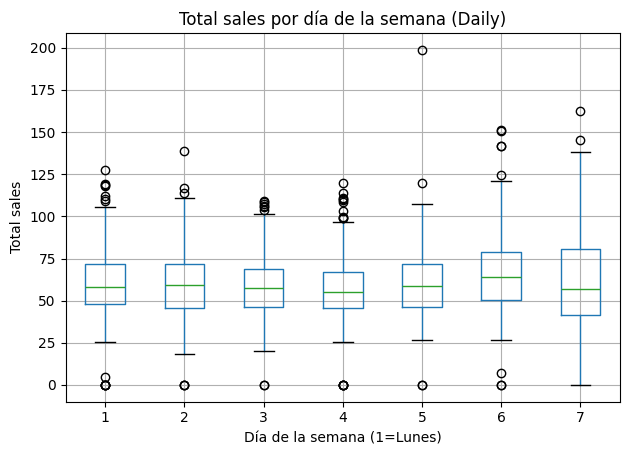

In [44]:
# -----------------------------------------
# 3.2.3 - Boxplot por día de la semana (Daily)
# -----------------------------------------

# Daily: estacionalidad por día de la semana (boxplot)
if "Daily" in datasets:
    df = datasets["Daily"].copy()
    # Ordenar de lunes (1) a domingo (7)
    df = df.sort_values('Weekday Number')
    plt.figure()
    df.boxplot(column='Total sales', by='Weekday Number')
    plt.title("Total sales por día de la semana (Daily)")
    plt.suptitle("")
    plt.xlabel("Día de la semana (1=Lunes)")
    plt.ylabel("Total sales")
    plt.tight_layout()
    savefig("box_weekday_daily")
    plt.show()

*No tiene forma interactiva porque sólo es una gráfica fija.*

Con plotly:

In [45]:
import plotly.express as px

if "Daily" in datasets:
    d = datasets["Daily"].copy()
    d['datum'] = pd.to_datetime(d['datum'], errors='coerce')
    if 'Weekday Number' not in d.columns:
        d['Weekday Number'] = d['datum'].dt.dayofweek + 1  # lunes=1
    d = d.dropna(subset=['Total sales', 'Weekday Number']).sort_values('Weekday Number')
    if d.empty:
        print("[Daily] sin datos para boxplot por día.")
    else:
        fig = px.box(d, x='Weekday Number', y='Total sales',
                     title="Total sales por día de la semana (Daily)",
                     labels={'Weekday Number': 'Día (1=Lunes)', 'Total sales': 'Total sales'},
                     category_orders={'Weekday Number': [1,2,3,4,5,6,7]})
        fig.update_layout(margin=dict(l=10, r=10, t=50, b=10))
        fig.show()
else:
    print("No existe dataset 'Daily'.")

**3.2.4 - Histogramas + KDE (Hourly, Daily, Weekly, Monthly)**  

__¿Qué es KDE?__  
En estadística, KDE significa Estimación de la Densidad del Kernel (Kernel Density Estimation). Es un método no paramétrico para estimar la función de densidad de probabilidad de una variable aleatoria. En esencia, KDE suaviza los datos observados para crear una representación continua de la distribución de probabilidad de la variable. 

[OK] Figura guardada: ..\docs\plots\hist_kde_total_sales_hourly.png


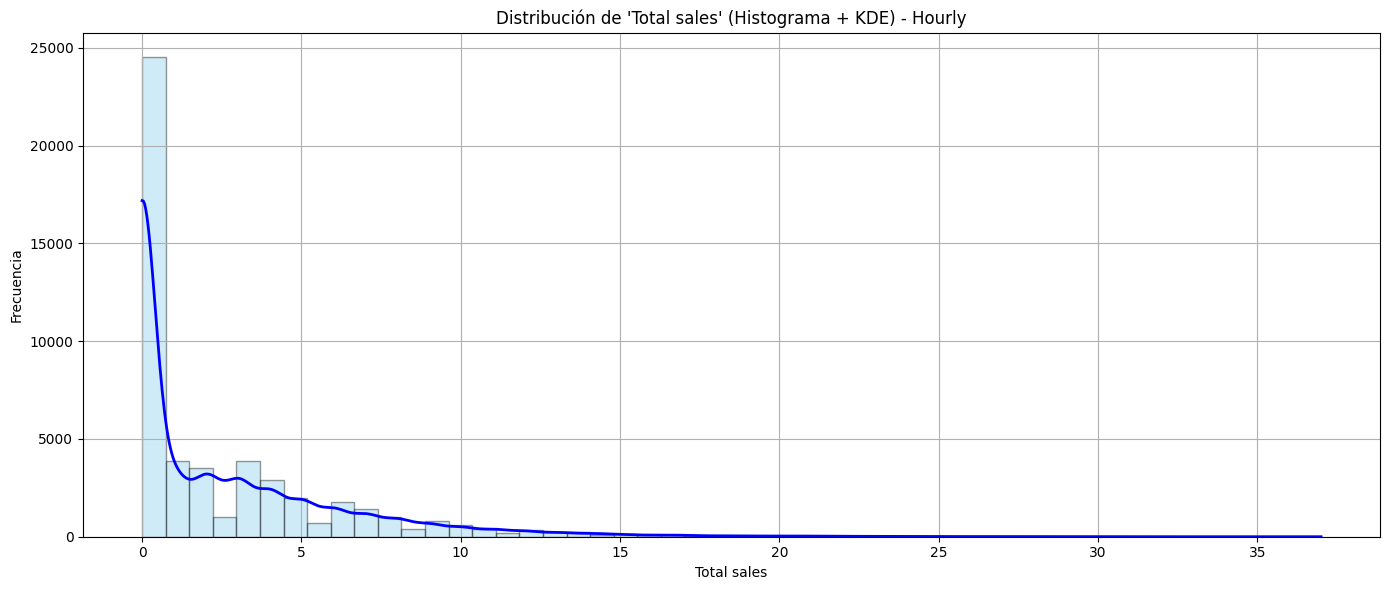

[OK] Figura guardada: ..\docs\plots\hist_kde_total_sales_daily.png


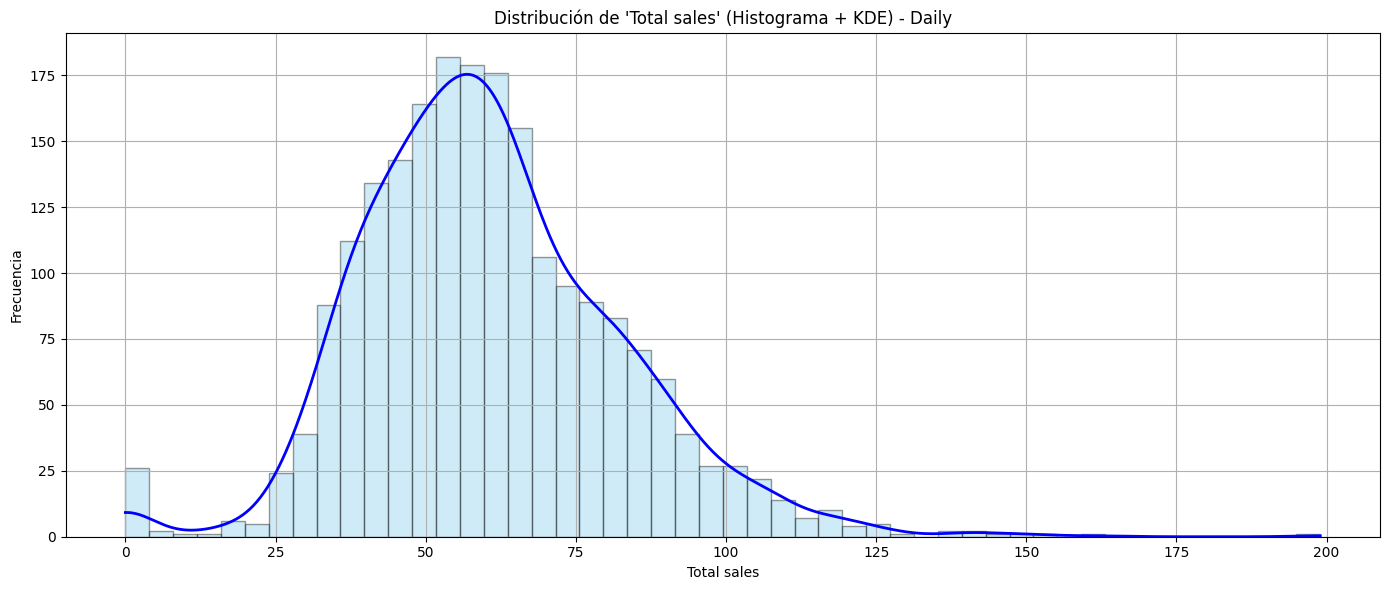

[OK] Figura guardada: ..\docs\plots\hist_kde_total_sales_weekly.png


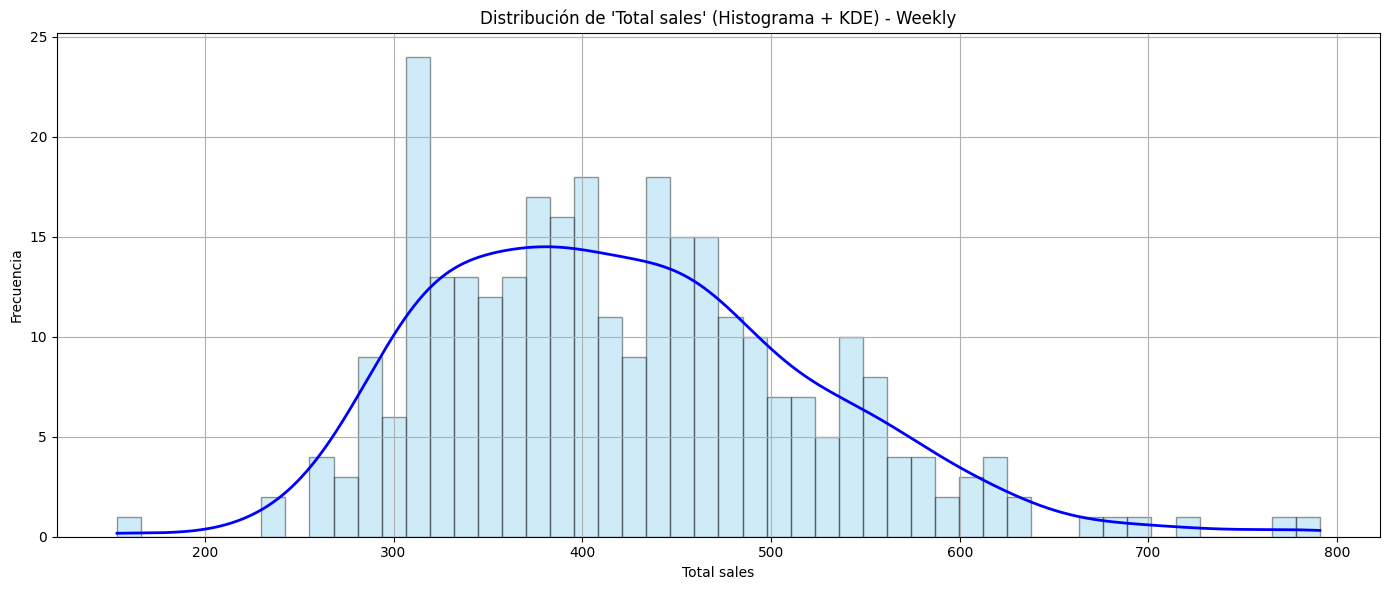

[OK] Figura guardada: ..\docs\plots\hist_kde_total_sales_monthly.png


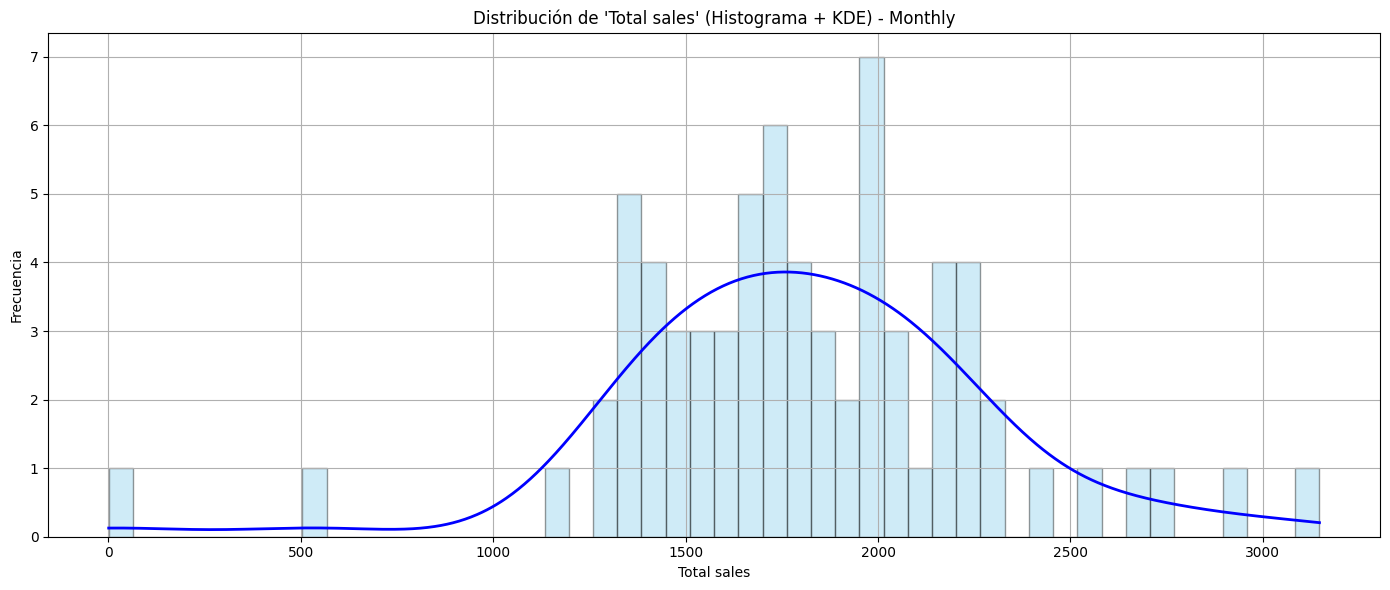

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

for name, df in datasets.items():
    # Asegurar columna y datos válidos
    if "Total sales" not in df.columns:
        print(f"[{name}] No existe la columna 'Total sales'. Se omite.")
        continue

    data = df["Total sales"].dropna().values
    if len(data) < 2 or np.all(data == data[0]):
        print(f"[{name}] Datos insuficientes o sin variación para KDE. Se muestra solo histograma.")
        plt.figure(figsize=(14, 6))
        plt.hist(data, bins=50, alpha=0.4, color='skyblue', edgecolor='black')
        plt.title(f"Distribución de 'Total sales' - {name}")
        plt.xlabel("Total sales")
        plt.ylabel("Frecuencia")
        plt.grid(True)
        plt.show()
        continue

    # Histograma (conteo, no densidad) para obtener ancho de bin
    plt.figure(figsize=(14, 6))
    count, bins, _ = plt.hist(
        data,
        bins=50,
        # density=True,   # <-- lo dejamos en conteo
        alpha=0.4,
        color='skyblue',
        edgecolor='black'
    )

    # KDE y escalado para que se superponga al conteo del histograma
    kde = gaussian_kde(data)
    x_vals = np.linspace(data.min(), data.max(), 1000)
    bin_width = bins[1] - bins[0]
    y_kde_scaled = kde(x_vals) * len(data) * bin_width

    plt.plot(x_vals, y_kde_scaled, color='blue', lw=2)

    plt.title(f"Distribución de 'Total sales' (Histograma + KDE) - {name}")
    plt.xlabel("Total sales")
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.tight_layout()
    savefig(f"hist_kde_total_sales_{name.lower()}")
    plt.show()

#### **3.3 - Comparaciones**

**3.3.1 - Ventas por categoría**  

Diagrama de barras horizontal por cada categoría de fármaco en cada dataset mostrando el ranking más el %.


=== 3.3.1 - Ventas por categoría: Hourly ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98
[OK] Figura guardada: ..\docs\plots\ventas_por_categoria_hourly.png


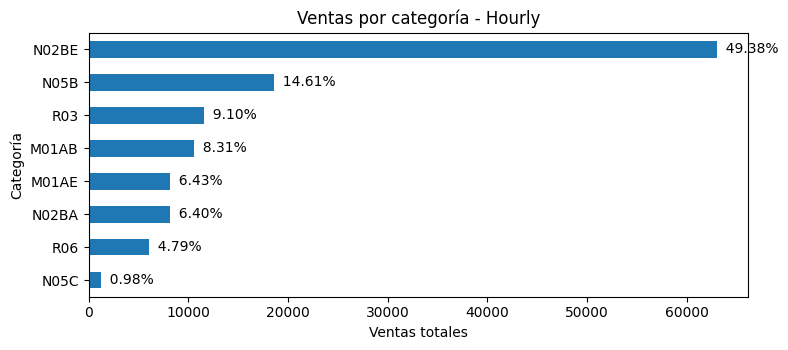


=== 3.3.1 - Ventas por categoría: Daily ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98
[OK] Figura guardada: ..\docs\plots\ventas_por_categoria_daily.png


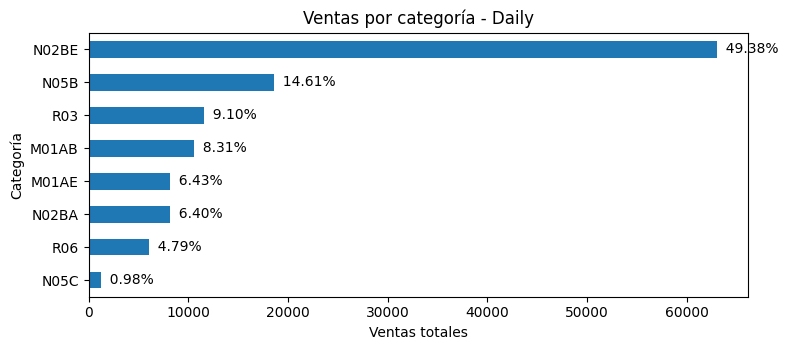


=== 3.3.1 - Ventas por categoría: Weekly ===
       Ventas totales  Porcentaje (%)
N02BE    63005.402708           49.38
N05B     18645.737500           14.61
R03      11608.822917            9.10
M01AB    10600.937083            8.31
M01AE     8204.618646            6.43
N02BA     8172.209000            6.40
R06       6107.817500            4.79
N05C      1249.958333            0.98
[OK] Figura guardada: ..\docs\plots\ventas_por_categoria_weekly.png


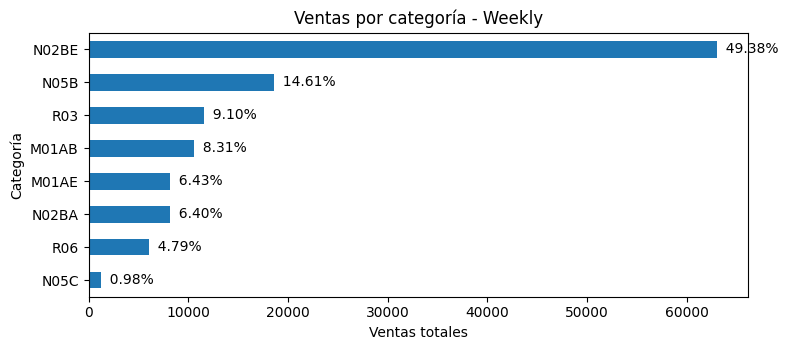


=== 3.3.1 - Ventas por categoría: Monthly ===
       Ventas totales  Porcentaje (%)
N02BE       62477.945           49.36
N05B        18348.300           14.49
R03         11737.250            9.27
M01AB       10499.440            8.29
M01AE        8156.000            6.44
N02BA        8051.459            6.36
R06          6066.380            4.79
N05C         1249.000            0.99
[OK] Figura guardada: ..\docs\plots\ventas_por_categoria_monthly.png


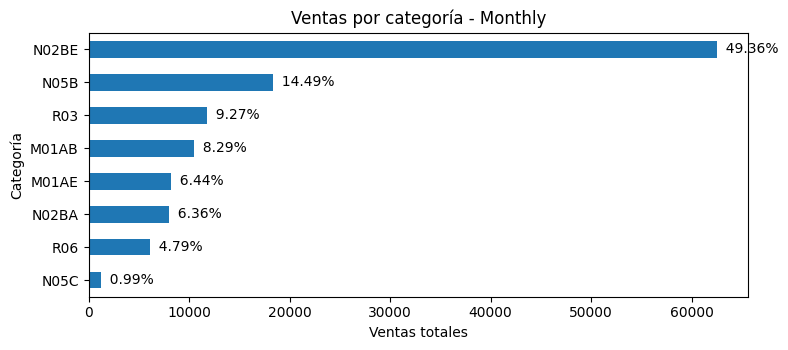

In [47]:
for name, df in datasets.items():
    # Filtrar solo categorías presentes (por seguridad)
    cats_present = [c for c in drugs if c in df.columns]
    if not cats_present:
        print(f"[{name}] No hay columnas de categorías presentes.")
        continue

    # Totales por categoría
    sales = df[cats_present].sum().sort_values(ascending=False)
    pct = (sales / sales.sum() * 100).round(2)

    # DataFrame para imprimir y graficar
    comp_df = pd.DataFrame({
        "Ventas totales": sales,
        "Porcentaje (%)": pct
    })

    print(f"\n=== 3.3.1 - Ventas por categoría: {name} ===")
    print(comp_df)

    # Gráfico de barras horizontales con porcentaje anotado
    plt.figure(figsize=(8, max(3, 0.45 * len(comp_df))))
    ax = comp_df["Ventas totales"].plot(kind="barh")
    plt.title(f"Ventas por categoría - {name}")
    plt.xlabel("Ventas totales")
    plt.ylabel("Categoría")
    plt.gca().invert_yaxis()  # top = mayor valor

    # Anotar porcentaje al lado de cada barra
    for i, (val, p) in enumerate(zip(comp_df["Ventas totales"], comp_df["Porcentaje (%)"])):
        plt.text(val, i, f"  {p:.2f}%", va="center")

    plt.tight_layout()
    savefig(f"ventas_por_categoria_{name.lower()}")
    plt.show()

**3.3.2 - Heatmap día-hora**

[OK] Figura guardada: ..\docs\plots\heatmap_day_hour_hourly.png


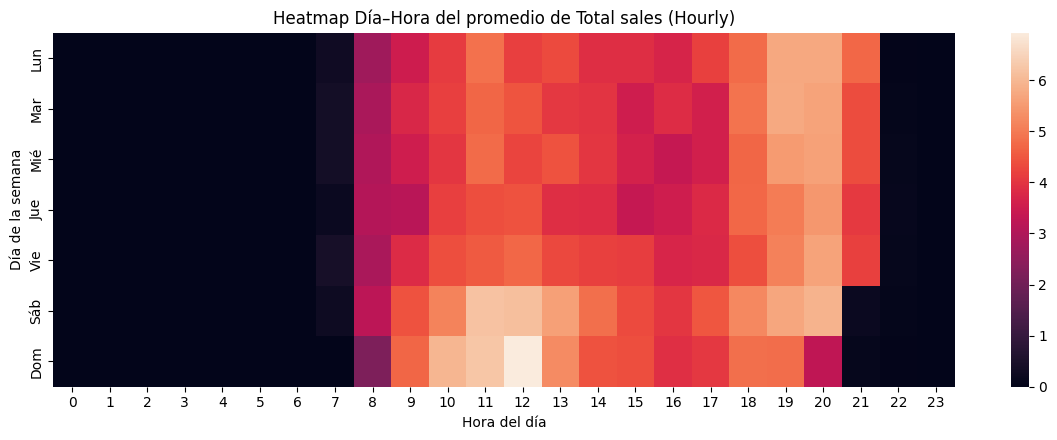

In [48]:
if "Hourly" in datasets:
    dfh = datasets["Hourly"].copy()

    # Asegurar datetime y columnas temporales necesarias
    if "datum" in dfh.columns:
        dfh["datum"] = pd.to_datetime(dfh["datum"], errors="coerce")
    else:
        raise KeyError("El dataset 'Hourly' no tiene la columna 'datum'.")

    if "Total sales" not in dfh.columns:
        # Si no existe, la creamos a partir de las categorías presentes
        cats_present = [c for c in drugs if c in dfh.columns]
        if not cats_present:
            raise KeyError("No se puede construir 'Total sales': no hay columnas de categorías en Hourly.")
        dfh["Total sales"] = dfh[cats_present].sum(axis=1, skipna=True)

    # Derivar Hour y Weekday Number si no existen
    if "Hour" not in dfh.columns:
        dfh["Hour"] = dfh["datum"].dt.hour
    if "Weekday Number" not in dfh.columns:
        dfh["Weekday Number"] = dfh["datum"].dt.dayofweek + 1  # 1=Lunes ... 7=Domingo

    # Tabla pivote: promedio de Total sales por día de semana y hora
    heat = (
        dfh
        .groupby(["Weekday Number", "Hour"], as_index=False)["Total sales"]
        .mean()
        .pivot(index="Weekday Number", columns="Hour", values="Total sales")
        .reindex(index=[1,2,3,4,5,6,7])  # asegurar orden L→D
    )

    # Etiquetas de días
    day_labels = {1:"Lun", 2:"Mar", 3:"Mié", 4:"Jue", 5:"Vie", 6:"Sáb", 7:"Dom"}
    heat.index = heat.index.map(day_labels)

    # Dibujar heatmap
    plt.figure(figsize=(12, 4.5))
    sns.heatmap(heat, annot=False)  # puedes poner annot=True si quieres los números
    plt.title("Heatmap Día–Hora del promedio de Total sales (Hourly)")
    plt.xlabel("Hora del día")
    plt.ylabel("Día de la semana")
    plt.tight_layout()
    savefig("heatmap_day_hour_hourly")
    plt.show()
else:
    print("No existe el dataset 'Hourly'; se omite el heatmap Día–Hora.")


### <u><span style="background-color: #00AAFF;">__4 - Análisis de patrones y correlaciones__</span></u>  

#### **4.1 - Correlaciones entre categorías** 

Veamos antes una tabla comparativa entre el coeficiente de Pearson y el de Spearman. En este caso, usaré Spearman.

| Característica                              | Coeficiente de Pearson                                          | Coeficiente de Spearman                                          |
|---------------------------------------------|------------------------------------------------------------------|-------------------------------------------------------------------|
| **Tipo de relación que mide**               | Relación lineal entre dos variables                              | Relación monótona (puede ser lineal o no)                         |
| **Datos que utiliza**                       | Valores originales                                              | Rangos (posiciones ordenadas)                                     |
| **Escala de medición requerida**            | Intervalo o razón                                                | Ordinal, intervalo o razón                                        |
| **Sensibilidad a outliers**                 | Alta (los outliers pueden distorsionar fuertemente el resultado) | Baja (menos afectado por outliers)                                |
| **Supuestos principales**                   | Linealidad, homocedasticidad, distribución aproximadamente normal| No requiere normalidad ni homocedasticidad                        |
| **Valores que devuelve**                    | Entre -1 y 1                                                     | Entre -1 y 1                                                      |
| **Interpretación**                          | 1: correlación positiva perfecta lineal<br>-1: negativa perfecta lineal<br>0: no hay relación lineal | 1: correlación positiva perfecta monótona<br>-1: negativa perfecta monótona<br>0: no hay relación monótona |
| **Cuándo usarlo**                           | Cuando la relación es aproximadamente lineal y no hay muchos outliers | Cuando la relación no es lineal, los datos no son normales o hay presencia de outliers |

[OK] Figura guardada: ..\docs\plots\heatmap_corr_atc_hourly.png


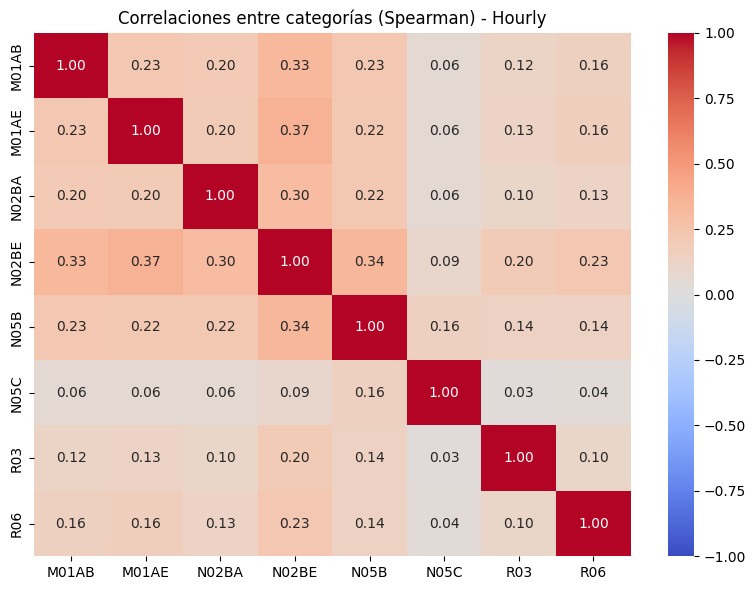

[OK] Figura guardada: ..\docs\plots\heatmap_corr_atc_daily.png


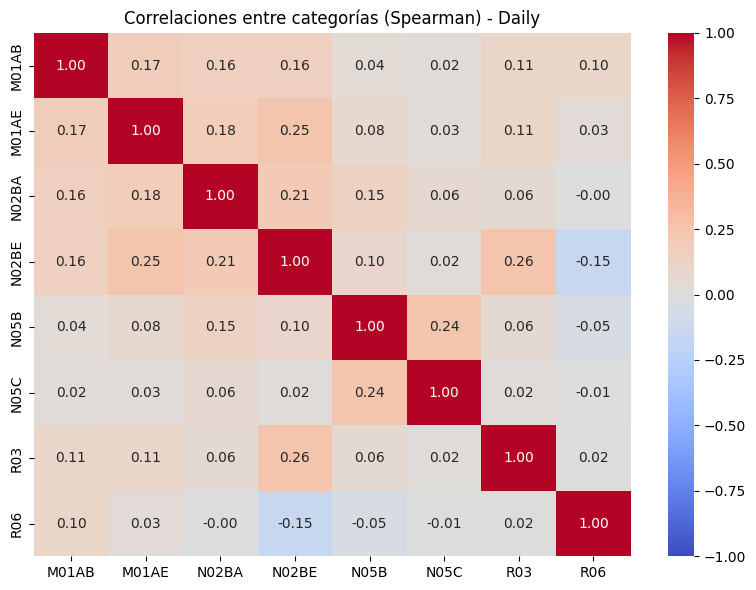

[OK] Figura guardada: ..\docs\plots\heatmap_corr_atc_weekly.png


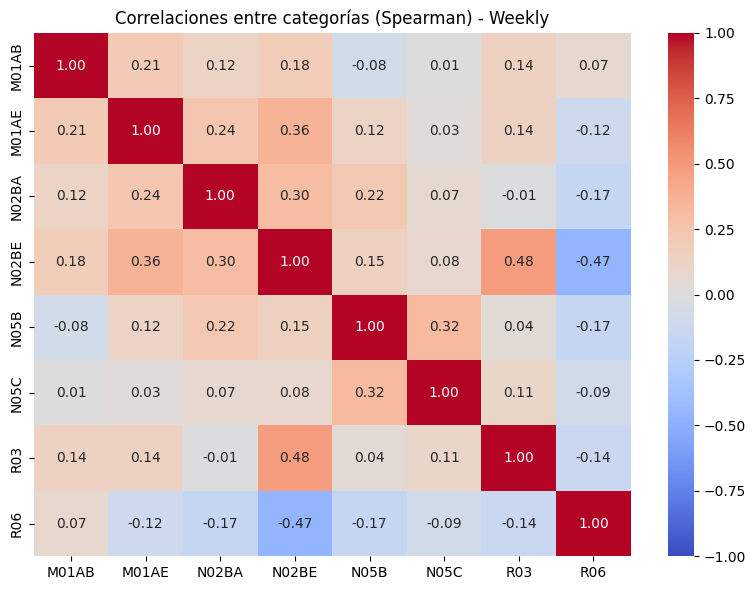

[OK] Figura guardada: ..\docs\plots\heatmap_corr_atc_monthly.png


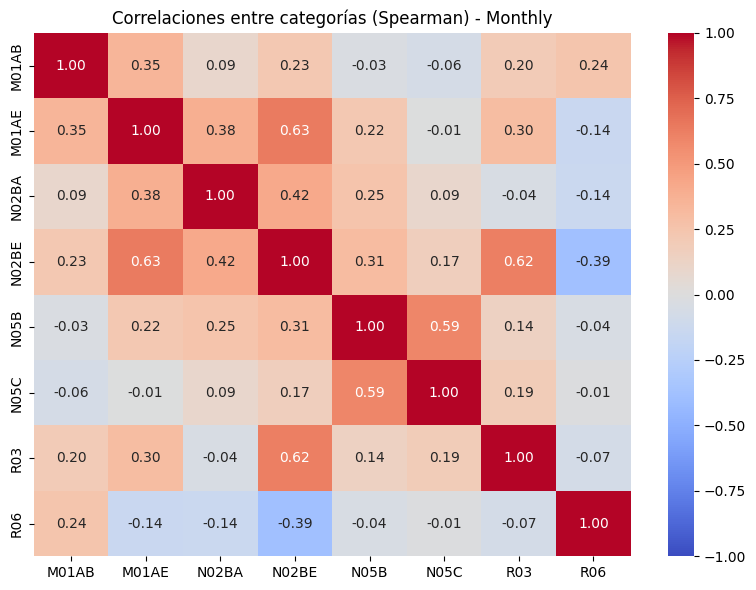


No se encontraron pares con correlación alta en ningún dataset.


In [49]:
# Lista de categorías de fármacos
categories = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# Umbral para alta correlación
threshold = 0.7

# Lista para acumular resultados de pares con alta correlación
resumen_pares = []

for name, df in datasets.items():
    # Filtrar columnas que existan
    cols_present = [c for c in categories if c in df.columns]
    if not cols_present:
        print(f"[{name}] No hay columnas de categorías presentes.")
        continue

    # Calcular correlación Spearman
    corr_matrix = df[cols_present].corr(method="spearman")

    # ---- Extraer pares con alta correlación ----
    corr_unstack = corr_matrix.unstack()
    # Eliminar duplicados y diagonal
    corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]
    corr_unstack = corr_unstack.drop_duplicates().sort_values(ascending=False)

    high_corrs = corr_unstack[abs(corr_unstack) > threshold]

    if not high_corrs.empty:
        for (cat1, cat2), val in high_corrs.items():
            resumen_pares.append({
                "Dataset": name,
                "Categoría 1": cat1,
                "Categoría 2": cat2,
                "Correlación Spearman": round(val, 2)
            })

    # ---- Heatmap ----
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        center=0,
        vmin=-1, vmax=1
    )
    plt.title(f"Correlaciones entre categorías (Spearman) - {name}")
    plt.tight_layout()
    savefig(f"heatmap_corr_atc_{name.lower()}")
    plt.show()

# ---- Tabla resumen de todos los datasets ----
if resumen_pares:
    resumen_df = pd.DataFrame(resumen_pares)
    print("\nPares con alta correlación (> |0.7|) en cualquier dataset:")
    print(resumen_df.to_string(index=False))
else:
    print("\nNo se encontraron pares con correlación alta en ningún dataset.")


#### **4.2 - Estacionalidad**  

Repetir patrones en meses/años (boxplots y líneas por año).  

Nos calcula:
- La autocorrelación de la serie para distintos desfases (lags).
- El lag con mayor correlación para indicar un posible ciclo repetitivo.
- El gráfico de autocorrelación.


=== Hourly ===
Estacionalidad: lag con mayor autocorrelación = 168 pasos (0.44)
[OK] Figura guardada: ..\docs\plots\autocorr_hourly.png


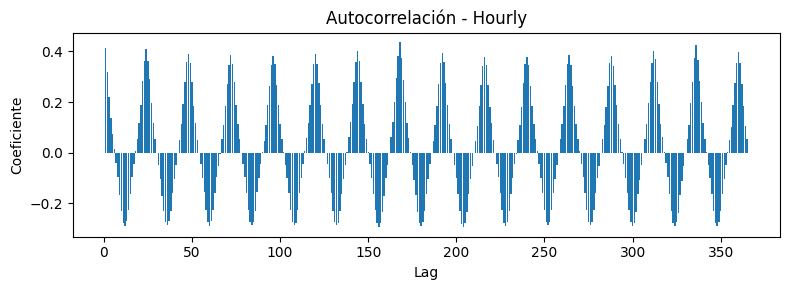


=== Daily ===
Estacionalidad: lag con mayor autocorrelación = 7 pasos (0.40)
[OK] Figura guardada: ..\docs\plots\autocorr_daily.png


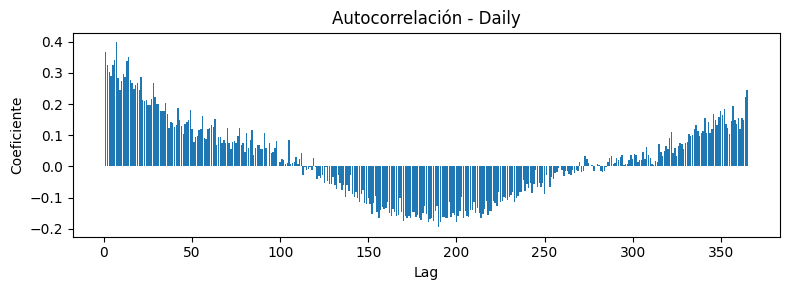


=== Weekly ===
Estacionalidad: lag con mayor autocorrelación = 301 pasos (0.73)


c:\Users\AnaGu\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3037: RuntimeWarning:

Degrees of freedom <= 0 for slice

c:\Users\AnaGu\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning:

divide by zero encountered in divide

c:\Users\AnaGu\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:2894: RuntimeWarning:

invalid value encountered in multiply



[OK] Figura guardada: ..\docs\plots\autocorr_weekly.png


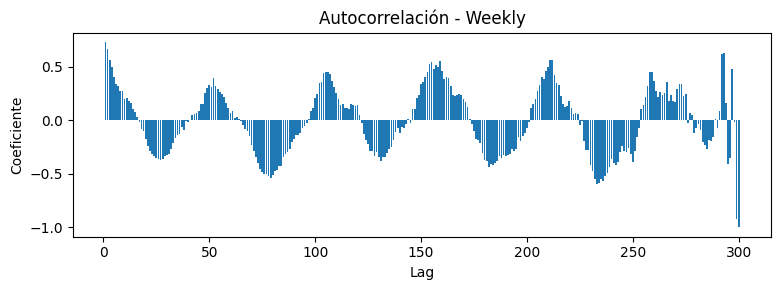


=== Monthly ===
Estacionalidad: lag con mayor autocorrelación = 69 pasos (1.00)
[OK] Figura guardada: ..\docs\plots\autocorr_monthly.png


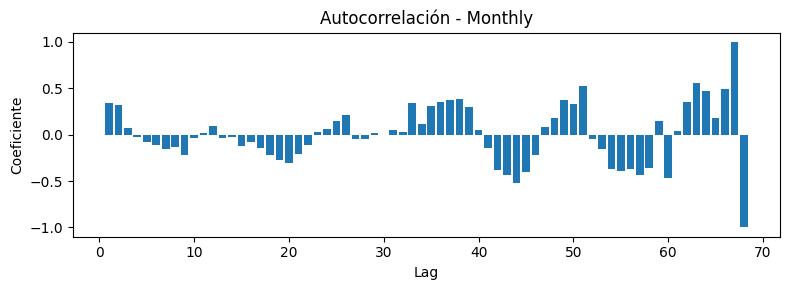

In [50]:
from scipy.signal import find_peaks

# Dataset y columna de ventas
sales_col = "Total sales"

# Umbral para detección de picos
std_multiplier = 2  # picos > media + 2*std

for name, df in datasets.items():
    print(f"\n=== {name} ===")

    # Asegurar orden temporal
    df = df.sort_values("datum").copy()

    # ----- Estacionalidad -----
    # Calcular autocorrelación para lags (hasta 365 si Daily, menos si Weekly/Monthly)
    n_lags = min(365, len(df) - 1)
    autocorr_values = [df[sales_col].autocorr(lag=lag) for lag in range(1, n_lags + 1)]

    # Buscar el lag con mayor autocorrelación (excepto lag=1)
    max_lag = np.argmax(autocorr_values) + 1
    max_corr = max(autocorr_values)

    print(f"Estacionalidad: lag con mayor autocorrelación = {max_lag} pasos ({max_corr:.2f})")

    # Graficar autocorrelación
    plt.figure(figsize=(8, 3))
    plt.bar(range(1, n_lags + 1), autocorr_values)
    plt.title(f"Autocorrelación - {name}")
    plt.xlabel("Lag")
    plt.ylabel("Coeficiente")
    plt.tight_layout()
    savefig(f"autocorr_{name.lower()}")
    plt.show()

#### **4.3 - Cambios de tendencia o picos**

Eventos o campañas que se pueden intuir de las series temporales calculadas anteriormente.

Nos calcula:  
- Un umbral dinámico = media + (k × desviación estándar).
- Usa `find_peaks` para encontrar ventas que superen ese umbral.
- Lista fechas y valores de esos picos.
- La gráfica de la serie temporal marcando los picos detectados.


=== Hourly ===
Picos detectados: 2306
Fechas de picos:
2014-01-02 - 24.40
2014-01-03 - 25.80
2014-01-03 - 12.00
2014-01-04 - 18.00
2014-01-04 - 17.00
2014-01-05 - 20.90
2014-01-06 - 13.00
2014-01-08 - 12.53
2014-01-08 - 12.00
2014-01-10 - 17.00
2014-01-10 - 13.00
2014-01-11 - 11.00
2014-01-11 - 17.00
2014-01-12 - 11.83
2014-01-13 - 20.00
2014-01-13 - 12.00
2014-01-14 - 10.00
2014-01-15 - 10.00
2014-01-16 - 10.00
2014-01-17 - 14.68
2014-01-18 - 14.00
2014-01-18 - 14.53
2014-01-19 - 11.63
2014-01-20 - 17.00
2014-01-21 - 10.00
2014-01-23 - 10.00
2014-01-24 - 10.33
2014-01-25 - 24.00
2014-01-25 - 12.00
2014-01-27 - 11.00
2014-01-28 - 13.00
2014-01-30 - 15.00
2014-01-31 - 10.00
2014-02-01 - 10.66
2014-02-01 - 14.00
2014-02-01 - 13.00
2014-02-02 - 11.50
2014-02-03 - 10.00
2014-02-04 - 14.33
2014-02-04 - 10.00
2014-02-05 - 10.00
2014-02-06 - 10.00
2014-02-06 - 13.00
2014-02-06 - 11.50
2014-02-07 - 11.40
2014-02-08 - 10.33
2014-02-08 - 10.00
2014-02-08 - 10.34
2014-02-09 - 24.40
2014-02-09 - 

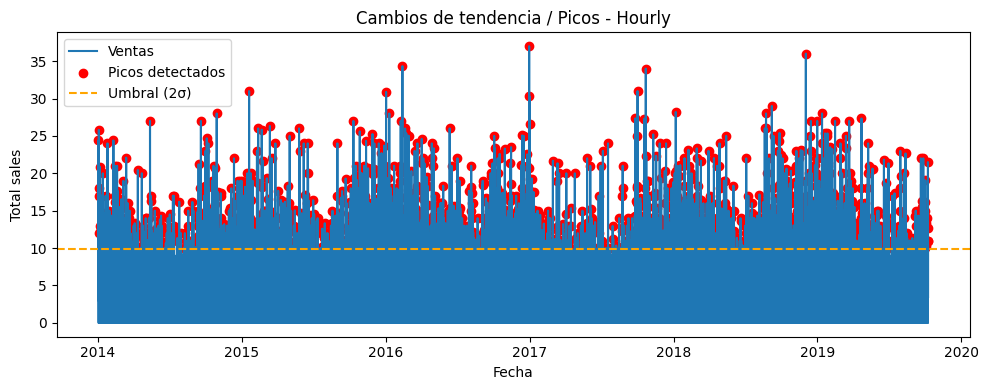


=== Daily ===
Picos detectados: 57
Fechas de picos:
2014-01-03 - 107.00
2014-02-12 - 107.37
2014-02-19 - 105.65
2014-09-30 - 116.64
2014-10-04 - 108.35
2014-12-28 - 125.50
2015-01-24 - 120.57
2015-04-10 - 105.94
2015-10-05 - 104.52
2015-10-12 - 111.84
2015-10-24 - 108.69
2015-11-01 - 112.32
2015-11-07 - 104.81
2015-12-26 - 120.83
2015-12-28 - 127.80
2016-01-09 - 118.29
2016-01-11 - 108.90
2016-01-14 - 110.16
2016-01-29 - 119.67
2016-02-07 - 118.42
2016-02-12 - 106.59
2016-02-28 - 125.63
2016-03-06 - 111.95
2016-03-21 - 118.76
2016-03-27 - 107.28
2016-04-03 - 117.87
2016-10-02 - 138.26
2016-10-09 - 117.60
2016-10-11 - 138.82
2016-10-16 - 126.75
2016-10-29 - 141.47
2016-12-12 - 110.02
2016-12-24 - 107.23
2016-12-30 - 198.95
2017-01-05 - 111.13
2017-01-10 - 113.67
2017-01-12 - 109.88
2017-01-16 - 104.39
2017-01-25 - 108.62
2017-10-01 - 113.99
2017-10-08 - 115.23
2017-12-31 - 109.37
2018-02-11 - 106.78
2018-03-02 - 104.40
2018-03-30 - 106.79
2018-10-25 - 113.96
2018-12-02 - 125.65
2018-12

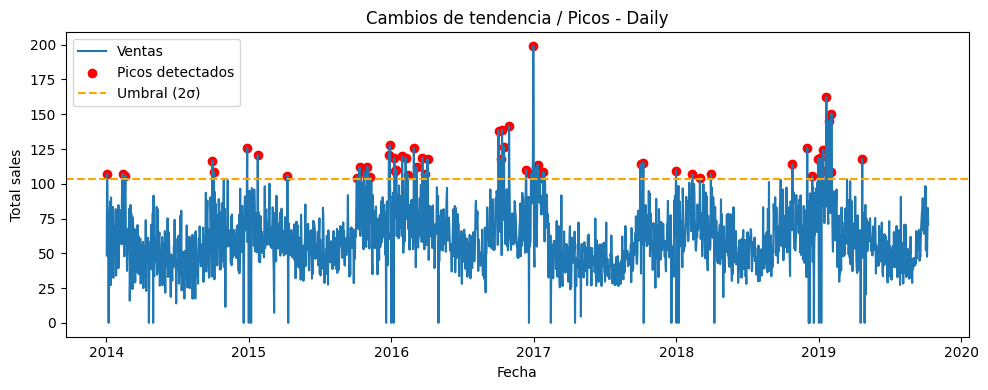


=== Weekly ===
Picos detectados: 7
Fechas de picos:
2015-10-18 - 632.33
2016-10-16 - 666.60
2017-01-01 - 790.84
2017-01-15 - 680.88
2018-02-11 - 623.36
2018-12-30 - 629.62
2019-01-27 - 772.39
[OK] Figura guardada: ..\docs\plots\peaks_weekly.png


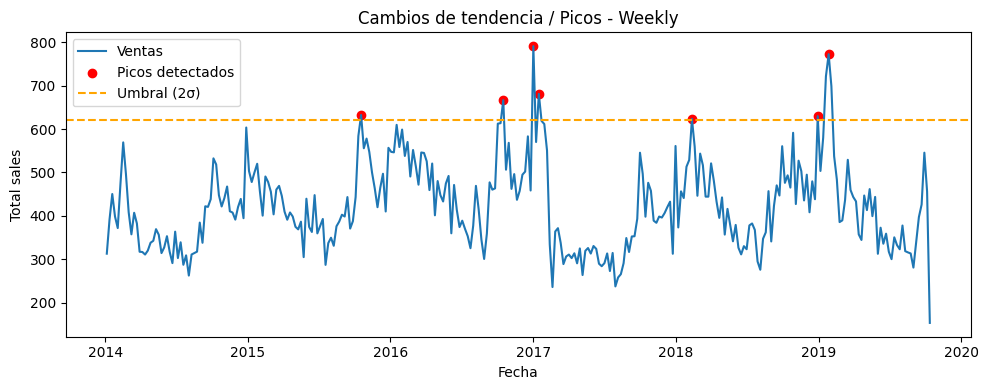


=== Monthly ===
Picos detectados: 2
Fechas de picos:
2014-10-31 - 3146.91
2019-01-31 - 2907.86
[OK] Figura guardada: ..\docs\plots\peaks_monthly.png


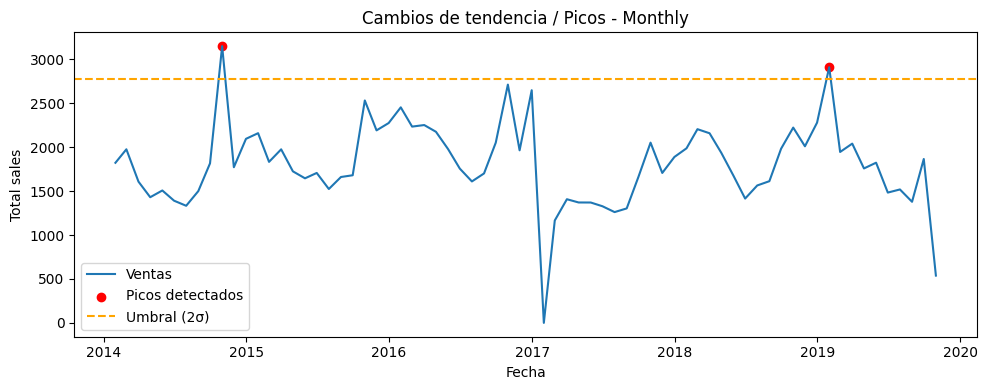

In [51]:
for name, df in datasets.items():
    print(f"\n=== {name} ===")

    # ----- Detección de picos -----
    # Umbral dinámico usando media + k*std
    threshold = df[sales_col].mean() + std_multiplier * df[sales_col].std()

    # Usar find_peaks
    peaks, _ = find_peaks(df[sales_col], height=threshold)

    print(f"Picos detectados: {len(peaks)}")
    if len(peaks) > 0:
        print("Fechas de picos:")
        for p in peaks:
            print(f"{df.iloc[p]['datum'].date()} - {df.iloc[p][sales_col]:.2f}")

    # Graficar serie con picos marcados
    plt.figure(figsize=(10, 4))
    plt.plot(df["datum"], df[sales_col], label="Ventas")
    plt.scatter(df.iloc[peaks]["datum"], df.iloc[peaks][sales_col],
                color="red", label="Picos detectados")
    plt.axhline(threshold, color="orange", linestyle="--", label=f"Umbral ({std_multiplier}σ)")
    plt.title(f"Cambios de tendencia / Picos - {name}")
    plt.xlabel("Fecha")
    plt.ylabel("Total sales")
    plt.legend()
    plt.tight_layout()
    savefig(f"peaks_{name.lower()}")
    plt.show()

Con Plotly:

In [52]:
# Gráfica Plotly con picos por dataset (Hourly, Daily, Weekly, Monthly)

import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import plotly.graph_objects as go

sales_col = "Total sales"
std_multiplier = 2  # umbral de picos = media + 2*std
drugs = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

for name, df in datasets.items():
    # Copia y orden temporal
    d = df.copy()
    d["datum"] = pd.to_datetime(d["datum"], errors="coerce")
    d = d.dropna(subset=["datum"]).sort_values("datum")

    # Asegurar columna Total sales (si no existe, la calculamos)
    if sales_col not in d.columns:
        cols_present = [c for c in drugs if c in d.columns]
        if not cols_present:
            print(f"[{name}] No hay columnas de categorías para construir '{sales_col}'. Se omite.")
            continue
        d[sales_col] = d[cols_present].sum(axis=1, skipna=True)

    # Serie y umbral
    y = pd.to_numeric(d[sales_col], errors="coerce").fillna(0.0)
    threshold = y.mean() + std_multiplier * y.std(ddof=0)

    # Picos
    peaks, _ = find_peaks(y.values, height=threshold)

    # ---- Plotly ----
    fig = go.Figure()

    # Serie temporal
    fig.add_trace(
        go.Scatter(
            x=d["datum"],
            y=y,
            mode="lines",
            name="Ventas"
        )
    )

    # Picos detectados
    if len(peaks) > 0:
        fig.add_trace(
            go.Scatter(
                x=d.iloc[peaks]["datum"],
                y=y.iloc[peaks],
                mode="markers",
                name="Picos detectados",
                marker=dict(size=8, color="red")
            )
        )

    # Línea horizontal del umbral
    try:
        fig.add_hline(
            y=float(threshold),
            line_dash="dash",
            line_color="orange",
            annotation_text=f"Umbral ({std_multiplier}σ)",
            annotation_position="top left"
        )
    except Exception:
        # Alternativa compatible
        fig.add_shape(
            type="line",
            x0=d["datum"].min(), x1=d["datum"].max(),
            y0=float(threshold), y1=float(threshold),
            line=dict(color="orange", dash="dash")
        )
        fig.add_annotation(
            x=d["datum"].min(),
            y=float(threshold),
            text=f"Umbral ({std_multiplier}σ)",
            showarrow=False,
            xanchor="left",
            yanchor="bottom",
            font=dict(color="orange")
        )

    fig.update_layout(
        title=f"Cambios de tendencia / Picos - {name}",
        xaxis_title="Fecha",
        yaxis_title="Total sales",
        hovermode="x unified",
        margin=dict(l=40, r=20, t=60, b=40)
    )

    # Mostrar una figura por dataset (clave para ver Hourly, Daily, Weekly y Monthly)
    fig.show()

### <u><span style="background-color: #00AAFF;">__5 - Estudios numéricos__</span></u>  

Carguemos antes las utilidades comunes.

In [53]:
import pandas as pd
import numpy as np

DRUGS = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

def ensure_dt(df):
    df = df.copy()
    df['datum'] = pd.to_datetime(df['datum'], errors='coerce')
    return df.sort_values('datum').reset_index(drop=True)

def cov(series):
    s = pd.to_numeric(series, errors='coerce')
    return (s.std(ddof=1) / s.mean()) if s.mean() != 0 else np.nan

def pct_change(cur, prev):
    return (cur/prev - 1.0) if prev not in [0, np.nan, None] else np.nan

def cagr(total_start, total_end, n_years):
    if (total_start is None) or (total_end is None) or (n_years is None) or (n_years <= 0) or total_start <= 0:
        return np.nan
    return (total_end/total_start)**(1/n_years) - 1

WD_MAP = {1:"Lun", 2:"Mar", 3:"Mié", 4:"Jue", 5:"Vie", 6:"Sáb", 7:"Dom"}


#### **5.1 - KPIs globales por granularidad**  

Resumen ejecutivo: tamaño de muestra, rango temporal, suma total, media, mediana, dispersión (CoV), mínimos/máximos.

In [54]:
# =========================================
# 5.1 - KPIs globales por granularidad
# =========================================

kpis = []
for name, df in datasets.items():
    d = ensure_dt(df)
    s = pd.to_numeric(d['Total sales'], errors='coerce')

    kpis.append({
        "Dataset": name,
        "Filas": len(d),
        "Fecha mín": d['datum'].min(),
        "Fecha máx": d['datum'].max(),
        "Total ventas": s.sum(),
        "Media": s.mean(),
        "Mediana": s.median(),
        "Desv.Est.": s.std(ddof=1),
        "CoV": cov(s),  # variabilidad relativa (<=0.3 estable; >0.5 muy variable aprox)
        "Mín": s.min(),
        "Máx": s.max()
    })

kpis_df = pd.DataFrame(kpis).sort_values("Dataset")
kpis_df.round(3).to_csv(ARTI_DIR / "kpis_por_dataset.csv", index=False)
kpis_df

Dataset  Filas           Fecha mín           Fecha máx   Total ventas  \
1    Daily   2106 2014-01-02 00:00:00 2019-10-08 00:00:00  127595.503687   
0   Hourly  50532 2014-01-02 08:00:00 2019-10-08 19:00:00  127595.503688   
3  Monthly     70 2014-01-31 00:00:00 2019-10-31 00:00:00  126585.774000   
2   Weekly    302 2014-01-05 00:00:00 2019-10-13 00:00:00  127595.503688   

         Media    Mediana   Desv.Est.       CoV      Mín          Máx  
1    60.586659    58.4665   21.561684  0.355882    0.000   198.950000  
0     2.525044     1.0000    3.680968  1.457784    0.000    37.000000  
3  1808.368200  1792.6170  480.265912  0.265580    1.000  3146.906000  
2   422.501668   409.0860   99.052693  0.234443  153.507   790.837167

**5.2 - Crecimiento anual (YoY) y CAGR (Monthly + Daily)**  

Tabla con ventas por año, Δ% YoY y CAGR del periodo.
- YoY %: crecimiento respecto al año anterior.
- CAGR: ritmo anual compuesto del periodo total (robusto ante “dientes de sierra”).

In [55]:
# =========================================
# 5.2 - Crecimiento anual (YoY) y CAGR (Monthly + Daily)
# =========================================

def yoy_cagr_table(df, label):
    d = ensure_dt(df)
    d['Year'] = d['datum'].dt.year
    ann = d.groupby('Year', as_index=False)['Total sales'].sum().sort_values('Year')
    ann['YoY %'] = ann['Total sales'].pct_change().mul(100).round(2)

    # CAGR del periodo completo
    if len(ann) >= 2:
        cagr_val = cagr(ann.iloc[0]['Total sales'], ann.iloc[-1]['Total sales'], ann.shape[0]-1)
    else:
        cagr_val = np.nan

    print(f"\n=== Crecimiento anual ({label}) ===")
    print(ann)
    print(f"CAGR {label}: {cagr_val*100:.2f}%\n")
    return ann, cagr_val

yoy_monthly, cagr_monthly = yoy_cagr_table(datasets.get("Monthly", pd.DataFrame()), "Monthly")
yoy_daily,   cagr_daily   = yoy_cagr_table(datasets.get("Daily",   pd.DataFrame()), "Daily")



=== Crecimiento anual (Monthly) ===
   Year  Total sales  YoY %
0  2014    21385.498    NaN
1  2015    22891.483   7.04
2  2016    25517.701  11.47
3  2017    16505.954 -35.32
4  2018    23034.061  39.55
5  2019    17251.077 -25.11
CAGR Monthly: -4.21%


=== Crecimiento anual (Daily) ===
   Year   Total sales  YoY %
0  2014  20238.337687    NaN
1  2015  22752.358000  12.42
2  2016  25234.926000  10.91
3  2017  19399.365667 -23.12
4  2018  22884.561000  17.97
5  2019  17085.955333 -25.34
CAGR Daily: -3.33%



**5.3 - Estacionalidad por mes (Daily) – Índice mensual**  

Índice = mediana mensual / mediana global − 1. Mide el uplift de cada mes vs un mes “típico”.  

Meses con índice positivo rinden por encima del “mes típico”; ideal para planificación de campañas y stock.

In [56]:
# =========================================
# 5.3 - Estacionalidad por mes (Daily) – Índice mensual
# =========================================

if "Daily" in datasets:
    d = ensure_dt(datasets["Daily"])
    d['Month'] = d['datum'].dt.month
    base = d['Total sales'].median()
    month_tbl = (d.groupby('Month')['Total sales']
                   .median()
                   .rename('Mediana mensual')
                   .to_frame())
    month_tbl['Índice vs mediana global (%)'] = ((month_tbl['Mediana mensual']/base - 1)*100).round(2)
    month_tbl = month_tbl.reset_index().sort_values('Month')

month_tbl

Month  Mediana mensual  Índice vs mediana global (%)
0       1        77.529583                         32.61
1       2        66.720000                         14.12
2       3        61.996500                          6.04
3       4        56.258000                         -3.78
4       5        54.368000                         -7.01
5       6        48.705000                        -16.70
6       7        46.079500                        -21.19
7       8        46.205000                        -20.97
8       9        58.495000                          0.05
9      10        71.850000                         22.89
10     11        61.801500                          5.70
11     12        70.840000                         21.16

**5.4 - Patrón semanal (Daily) – Uplift por día**  

Uplift día = media del día / media global − 1. Fácil de presentar a negocio para ajustar calendarios de reposición.  

Muestra qué días empujan más (ej. Lunes +12%) y cuáles flojean (Dom −18%).

In [57]:
# =========================================
# 5.4 - Patrón semanal (Daily) – Uplift por día
# =========================================

if "Daily" in datasets:
    d = ensure_dt(datasets["Daily"])
    d['Weekday Number'] = d['datum'].dt.dayofweek + 1
    base = d['Total sales'].mean()
    wd_tbl = (d.groupby('Weekday Number')['Total sales']
                .mean()
                .rename('Media por día')
                .to_frame())
    wd_tbl['Uplift vs media global (%)'] = ((wd_tbl['Media por día']/base - 1)*100).round(2)
    wd_tbl = wd_tbl.reset_index().sort_values('Weekday Number')
    wd_tbl['Día'] = wd_tbl['Weekday Number'].map(WD_MAP)
    wd_tbl[['Día','Media por día','Uplift vs media global (%)']]

wd_tbl


Weekday Number  Media por día  Uplift vs media global (%)  Día
0               1      60.607364                        0.03  Lun
1               2      60.017432                       -0.94  Mar
2               3      59.238425                       -2.23  Mié
3               4      57.184018                       -5.62  Jue
4               5      60.247480                       -0.56  Vie
5               6      65.673071                        8.40  Sáb
6               7      61.134343                        0.90  Dom

**5.5 - Patrón horario (Hourly) – Uplift por hora**  

Para dimensionar personal/operativa y ventanas de campañas.  

Identifica horas pico (+30% vs media) y horas valle (−25%), útil para SLA y staffing.

In [58]:
# =========================================
# 5.5 - Patrón horario (Hourly) – Uplift por hora
# =========================================

if "Hourly" in datasets:
    d = ensure_dt(datasets["Hourly"])
    if 'Hour' not in d.columns:
        d['Hour'] = d['datum'].dt.hour
    base = d['Total sales'].mean()
    hr = (d.groupby('Hour', as_index=False)['Total sales'].mean()
            .rename(columns={'Total sales':'Media por hora'}))
    hr['Uplift vs media global (%)'] = ((hr['Media por hora']/base - 1)*100).round(2)
    hr.sort_values('Hour').reset_index(drop=True)

hr

Hour  Media por hora  Uplift vs media global (%)
0      0        0.000000                     -100.00
1      1        0.000000                     -100.00
2      2        0.000000                     -100.00
3      3        0.000000                     -100.00
4      4        0.000000                     -100.00
5      5        0.000000                     -100.00
6      6        0.000000                     -100.00
7      7        0.272004                      -89.23
8      8        2.868352                       13.60
9      9        3.843552                       52.22
10    10        4.554328                       80.37
11    11        5.096845                      101.85
12    12        5.007699                       98.32
13    13        4.545759                       80.03
14    14        4.169361                       65.12
15    15        3.887425                       53.95
16    16        3.728370                       47.66
17    17        3.919423                       55.22
18    18        4.782325                       89.40
19    19        5.375953                      112.91
20    20        5.325920                      110.92
21    21        3.137042                       24.24
22    22        0.076209                      -96.98
23    23        0.000277                      -99.99

**5.6 - Mix de categorías (ATC) – Participación y concentración (HHI)**  

Enfoque de “cartera”: ¿qué ATC pesan más? ¿Concentración de riesgo?  

- Top1/Top3 (%): dependencia de pocos grupos.
- HHI: 0–0.15 (baja concentración), 0.15–0.25 (moderada), >0.25 (alta).
- Útil para riesgo de cartera y diversificación.

In [59]:
# =========================================
# 5.6 - Mix de categorías (ATC) – Participación y concentración (HHI)
# =========================================

mix_rows = []
for name, df in datasets.items():
    d = df.copy()
    cats = [c for c in DRUGS if c in d.columns]
    if not cats:
        continue
    totals = d[cats].sum()
    total_sum = totals.sum()
    share = (totals/total_sum).sort_values(ascending=False)  # fracciones 0..1
    hhi = (share.pow(2).sum())  # Índice de Herfindahl-Hirschman (0..1)
    top3_share = share.head(3).sum()

    mix_rows.append({
        "Dataset": name,
        "Top1 (%)": (share.iloc[0]*100).round(2) if len(share)>0 else np.nan,
        "Top3 (%)": (top3_share*100).round(2),
        "HHI": round(hhi, 4),
        "ATC Top1": share.index[0] if len(share)>0 else None
    })

mix_df = pd.DataFrame(mix_rows).sort_values("Dataset")
mix_df.to_csv(ARTI_DIR / "mix_categorias_hhi.csv", index=False)
mix_df

Dataset  Top1 (%)  Top3 (%)     HHI ATC Top1
1    Daily     49.38     73.09  0.2910    N02BE
0   Hourly     49.38     73.09  0.2910    N02BE
3  Monthly     49.36     73.12  0.2907    N02BE
2   Weekly     49.38     73.09  0.2910    N02BE

**5.7 - “Top N” periodos y anomalías (z-score/umbral dinámico)**  

Lista de fechas pico y detección de outliers numéricos.  

Rápido para explicar picos excepcionales y priorizar investigación.

In [60]:
# =========================================
# 5.7 - “Top N” periodos y anomalías (z-score/umbral dinámico)
# =========================================

from scipy.stats import zscore

TOP_N = 5
std_k = 2  # umbral: media + 2*std

tops = []
anoms = []

for name, df in datasets.items():
    d = ensure_dt(df)
    s = pd.to_numeric(d['Total sales'], errors='coerce')
    mu, sd = s.mean(), s.std(ddof=0)
    thr = mu + std_k*sd

    # Top N
    topn = d.nlargest(TOP_N, 'Total sales')[['datum','Total sales']].copy()
    topn['Dataset'] = name
    tops.append(topn)

    # Anomalías (umbral)
    mask = s >= thr
    anom = d.loc[mask, ['datum','Total sales']].copy()
    anom['Dataset'] = name
    anom['Umbral'] = thr
    anoms.append(anom)

tops_df  = pd.concat(tops,  ignore_index=True) if tops  else pd.DataFrame()
anoms_df = pd.concat(anoms, ignore_index=True) if anoms else pd.DataFrame()

print("\n=== Top N fechas con mayor Total sales ===")
print(tops_df.sort_values(['Dataset','Total sales'], ascending=[True, False]).to_string(index=False))

print("\n=== Anomalías por umbral dinámico (media+2*std) ===")
print(anoms_df.sort_values(['Dataset','datum']).to_string(index=False))


=== Top N fechas con mayor Total sales ===
              datum  Total sales Dataset
2016-12-30 00:00:00   198.950000   Daily
2019-01-20 00:00:00   162.283000   Daily
2016-12-31 00:00:00   151.239000   Daily
2019-02-02 00:00:00   150.508000   Daily
2019-01-27 00:00:00   145.365000   Daily
2016-12-30 12:00:00    37.000000  Hourly
2018-12-02 16:00:00    36.000000  Hourly
2016-02-12 20:00:00    34.330000  Hourly
2017-10-22 11:00:00    34.000000  Hourly
2015-01-19 19:00:00    31.000000  Hourly
2014-10-31 00:00:00  3146.906000 Monthly
2019-01-31 00:00:00  2907.863000 Monthly
2016-10-31 00:00:00  2710.141000 Monthly
2016-12-31 00:00:00  2646.011000 Monthly
2015-10-31 00:00:00  2529.576000 Monthly
2017-01-01 00:00:00   790.837167  Weekly
2019-01-27 00:00:00   772.393000  Weekly
2019-01-20 00:00:00   721.259000  Weekly
2019-02-03 00:00:00   698.663000  Weekly
2017-01-15 00:00:00   680.875417  Weekly

=== Anomalías por umbral dinámico (media+2*std) ===
              datum  Total sales Dataset  

**5.8 - Correlaciones entre categorías (Spearman) y pares fuertes**  

Para insights de sustitutivos/complementarios.  

Pares con correlación alta sugieren movimientos conjuntos (promos, estacionalidad compartida).

In [61]:
# =========================================
# 5.8 - Correlaciones entre categorías (Spearman) y pares fuertes
# =========================================

thr = 0.7  # umbral de interés absoluto

corr_rows = []
pair_rows = []

for name, df in datasets.items():
    cats = [c for c in DRUGS if c in df.columns]
    if len(cats) < 2:
        continue
    corr = df[cats].corr(method='spearman')

    # Pairs (upper triangle)
    cu = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    cu = cu.stack().reset_index()
    cu.columns = ['Cat1','Cat2','Spearman']
    strong = cu[cu['Spearman'].abs() >= thr].sort_values('Spearman', ascending=False)
    if not strong.empty:
        strong['Dataset'] = name
        pair_rows.append(strong)

    corr_rows.append((name, corr))

# Tablas
if pair_rows:
    pairs_df = pd.concat(pair_rows, ignore_index=True)
    print("\n=== Pares con |Spearman| >= 0.7 ===")
    print(pairs_df[['Dataset','Cat1','Cat2','Spearman']].to_string(index=False))
else:
    print("\nNo hay pares con |Spearman| >= 0.7")


No hay pares con |Spearman| >= 0.7


**5.9 - “One-pager” ejecutivo por dataset**  

Un “resumen para negocio” por cada granularidad (una fila = un dataset).  

Esta tabla es mi slide de apertura para dirección: volumen, crecimiento, estabilidad, estacionalidad y dependencia de cartera.

In [62]:
# =========================================
# 5.9 - “One-pager” ejecutivo por dataset
# =========================================

summary_rows = []

for name, df in datasets.items():
    d = ensure_dt(df)
    s = pd.to_numeric(d['Total sales'], errors='coerce')

    # KPIs clave
    total = s.sum()
    mean  = s.mean()
    med   = s.median()
    covv  = cov(s)

    # YoY si aplica
    d['Year'] = d['datum'].dt.year
    agg = d.groupby('Year', as_index=False)['Total sales'].sum().sort_values('Year')
    yoy_last = agg['Total sales'].pct_change().iloc[-1]*100 if len(agg) >= 2 else np.nan
    cagr_val = cagr(agg.iloc[0]['Total sales'], agg.iloc[-1]['Total sales'], agg.shape[0]-1) if len(agg) >= 2 else np.nan

    # Estacionalidad mensual (solo Daily)
    if name == "Daily":
        md = d.copy()
        md['Month'] = md['datum'].dt.month
        base = md['Total sales'].median()
        month_idx = (md.groupby('Month')['Total sales'].median()/base - 1)*100
        top_month = month_idx.idxmax() if not month_idx.empty else np.nan
        top_month_uplift = month_idx.max() if not month_idx.empty else np.nan
    else:
        top_month, top_month_uplift = np.nan, np.nan

    # Mix categorías (concentración)
    cats = [c for c in DRUGS if c in d.columns]
    if cats:
        share = (d[cats].sum()/d[cats].sum().sum()).sort_values(ascending=False)
        top1_cat = share.index[0]
        top1_pct = share.iloc[0]*100
        hhi = share.pow(2).sum()
    else:
        top1_cat = None; top1_pct = np.nan; hhi = np.nan

    summary_rows.append({
        "Dataset": name,
        "Fecha mín": d['datum'].min(),
        "Fecha máx": d['datum'].max(),
        "Total ventas": total,
        "Media": mean,
        "Mediana": med,
        "CoV": covv,
        "YoY último (%)": None if np.isnan(yoy_last) else round(yoy_last,2),
        "CAGR periodo (%)": None if (cagr_val is np.nan) else round(cagr_val*100,2),
        "Mes pico (Daily)": top_month,
        "Uplift mes pico (%)": None if np.isnan(top_month_uplift) else round(top_month_uplift,2),
        "ATC Top1": top1_cat,
        "ATC Top1 (%)": None if np.isnan(top1_pct) else round(top1_pct,2),
        "HHI": None if np.isnan(hhi) else round(hhi,4)
    })

summary_df = pd.DataFrame(summary_rows).sort_values("Dataset")
summary_df


Dataset           Fecha mín           Fecha máx   Total ventas  \
1    Daily 2014-01-02 00:00:00 2019-10-08 00:00:00  127595.503687   
0   Hourly 2014-01-02 08:00:00 2019-10-08 19:00:00  127595.503688   
3  Monthly 2014-01-31 00:00:00 2019-10-31 00:00:00  126585.774000   
2   Weekly 2014-01-05 00:00:00 2019-10-13 00:00:00  127595.503688   

         Media    Mediana       CoV  YoY último (%)  CAGR periodo (%)  \
1    60.586659    58.4665  0.355882          -25.34             -3.33   
0     2.525044     1.0000  1.457784          -25.34             -3.33   
3  1808.368200  1792.6170  0.265580          -25.11             -4.21   
2   422.501668   409.0860  0.234443          -24.71             -3.01   

   Mes pico (Daily)  Uplift mes pico (%) ATC Top1  ATC Top1 (%)     HHI  
1               1.0                32.61    N02BE         49.38  0.2910  
0               NaN                  NaN    N02BE         49.38  0.2910  
3               NaN                  NaN    N02BE         49.36  0.2907  
2               NaN                  NaN    N02BE         49.38  0.2910

**5.10 - Exportables para el informe**  

Guarda las tablas clave para adjuntar.

In [63]:
# kpis_df.to_csv("kpis_globales.csv", index=False)
# if 'yoy_monthly' in locals(): yoy_monthly.to_csv("crecimiento_anual_monthly.csv", index=False)
# if 'yoy_daily'   in locals(): yoy_daily.to_csv("crecimiento_anual_daily.csv",   index=False)
# if "Daily" in datasets:
#     month_tbl.to_csv("estacionalidad_mensual_daily.csv", index=False)
#     wd_tbl.to_csv("patron_semanal_daily.csv", index=False)
# if "Hourly" in datasets:
#     hr.to_csv("patron_horario_hourly.csv", index=False)
# mix_df.to_csv("mix_categorias_concentracion.csv", index=False)
# tops_df.to_csv("top_fechas_ventas.csv", index=False)
# anoms_df.to_csv("anomalias_umbral.csv", index=False)
# if 'pairs_df' in locals(): pairs_df.to_csv("correlaciones_fuertes.csv", index=False)
# summary_df.to_csv("resumen_ejecutivo.csv", index=False)

### <u><span style="background-color: #00AAFF;">__6 - Conclusiones y hallazgos__</u>  

#### **Aclaración de anclas temporales**

Para evitar ambigüedades, se ha documentado cómo se estructuran las fechas en cada granularidad:

- **Hourly:** cada fila representa una hora natural (00:00–23:00).  
- **Daily:** cada fila corresponde a un día natural completo.  
- **Weekly:** anclaje confirmado en **W-MON**, es decir, la fecha indica el lunes y cada fila resume la semana hasta domingo.  
- **Monthly:** cada fila representa el **último día del mes**, acumulando todas las ventas del mes.  

Estas definiciones son clave para la correcta interpretación de estacionalidades y comparaciones entre granularidades.

#### **6.1 - Tendencias globales:**  
- En la vista *daily*, se observa una tendencia general estable con fluctuaciones puntuales.  
- Las vistas *weekly* y *monthly* suavizan el ruido y muestran ciclos estacionales.  

#### **6.2 - Estacionalidad:**  
- En la vista *monthly*, se detectan picos recurrentes en ciertos meses, indicando un patrón estacional.  
- En la vista *hourly*, las ventas se concentran en franjas horarias específicas, con mayor actividad en horas laborables.  

#### **6.3 - Patrones del día:**  
- La vista *hourly* muestra un claro aumento en ciertas horas (por ejemplo, mañana y tarde) y descensos en horas nocturnas.  

#### **6.4 - Categorías dominantes:**  
- El ranking por categorías indica que algunas (como `N02BE`) representan un alto porcentaje de las ventas totales.  

#### **6.5 - Correlaciones:**  
- El análisis de correlación sugiere relaciones moderadas entre ciertas categorías, lo que podría indicar ventas conjuntas o estacionalidad compartida.  

#### **6.6 - Outliers:**  
- Se observan picos puntuales muy por encima de la media en *daily* y *hourly*, posiblemente vinculados a campañas, promociones o eventos especiales.  

Guardemos una copia de los df ya procesados en la carpeta train para no proceder al entrenamiento en el siguiente notebook `03_Entrenamiento_Evaluacion`.

In [64]:
# Guardamos una copia limpia para trabajar el train/test
df_saleshourly_clean   = df_saleshourly_processed.copy()
df_salesdaily_clean    = df_salesdaily_processed.copy()
df_salesweekly_clean   = df_salesweekly_processed.copy()
df_salesmonthly_clean  = df_salesmonthly_processed.copy()

df_saleshourly_clean.to_csv("../data/processed/saleshourly_clean.csv", index=False)
df_salesdaily_clean.to_csv("../data/processed/salesdaily_clean.csv", index=False)
df_salesweekly_clean.to_csv("../data/processed/salesweekly_clean.csv", index=False)
df_salesmonthly_clean.to_csv("../data/processed/salesmonthly_clean.csv", index=False)

print("Datasets limpios guardados en data/processed/: *_clean.csv")

Datasets limpios guardados en data/processed/: *_clean.csv


Podemos comprobar que los archivos se han guardado correctamente.

In [65]:
import os

os.listdir("../data/processed/")

['salesdaily_clean.csv',
 'saleshourly_clean.csv',
 'salesmonthly_clean.csv',
 'salesweekly_clean.csv']